In [ ]:
#ref: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

import os, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, json, pickle, transformers
import numpy as np

In [2]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)
    


In [8]:
###################csnli####################

import pickle, json
from scipy.special import softmax
from scipy.stats import entropy as entropy


path="/home/pritam.k/research/hlv/models/all_results/results/"
afolders = os.listdir(path+'csnli')

s = set(afolders)
files_sorted=[]
for x in sorted_nicely(s):
    files_sorted.append(x)

#print(files_sorted)
path="/home/pritam.k/research/hlv/models/all_results/results/"
ares_pkl=[]
for fname in files_sorted:
    sf = os.listdir(path+'csnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    #print(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'csnli/'+fname+'/results/'+d)
        path_1= path+'csnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.pkl'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[0], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        elif file[1].endswith('.pkl'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[1], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        res.append([entropy(pf_probs[i]) for i in range(len(pf_probs))])
    ares_pkl.append(res)



ares_json=[]
for fname in files_sorted:
    sf = os.listdir(path+'csnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'csnli/'+fname+'/results/'+d)
        path_1= path+'csnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.json'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[0]) as jfile:
                jf = json.load(jfile)
        elif file[1].endswith('.json'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[1]) as jfile:
                jf = json.load(jfile)
        res.append(jf['test_accuracy'])
    ares_json.append(res)

print(np.array(ares_pkl).shape)   
print(np.array(ares_json).shape)    

(19, 10, 152)
(19, 10)


In [9]:
df_ann_smnli=pd.DataFrame(ares_json, index=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            columns=['set'+str(j) for j in range(1,11)])

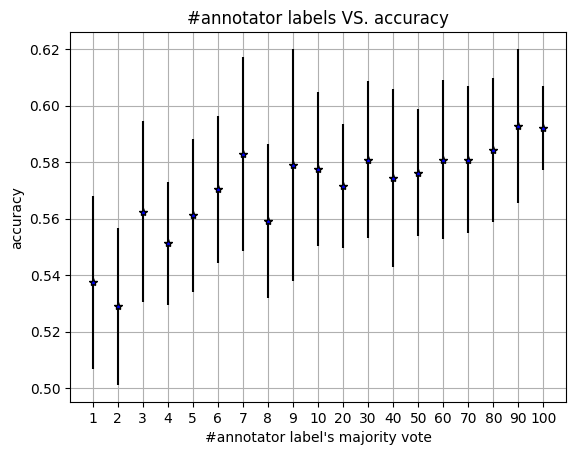

In [10]:
fig = plt.figure()
ax2  = fig.add_subplot(111)
plt.grid()
x = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
y = np.array(np.mean(ares_json, axis=1)) # Effectively y = x**2
e = np.array(np.std(ares_json, axis=1))
ax2.errorbar(x.astype('str'), y, e, color='k', markerfacecolor='blue', linestyle='None', marker='*')
ax2.set(
    title ="#annotator labels VS. accuracy",
    xlabel = "#annotator label's majority vote",
    ylabel = "accuracy")


#fig.savefig("ala.png", dpi=400)
plt.show()

In [11]:
df_ann_csnli_mean_entropy=pd.DataFrame(np.transpose(np.mean(ares_pkl, axis=1)), columns=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            #index=['smnli-csnli-mean-entropy-across-annotators-per-instance'])
)

In [12]:
df_ann_csnli_mean_entropy

a1        a2        a3        a4        a5        a6        a7  \
0    0.973175  0.868415  0.945346  0.844362  0.964022  0.852194  0.912906   
1    0.813533  0.493911  0.685218  0.624844  0.663634  0.650792  0.606683   
2    0.865443  0.607674  0.786415  0.638940  0.713729  0.770125  0.772684   
3    0.789418  0.468292  0.666808  0.478011  0.596536  0.604198  0.622451   
4    0.906304  0.704742  0.811894  0.846152  0.720936  0.838364  0.793694   
..        ...       ...       ...       ...       ...       ...       ...   
147  0.895291  0.830594  0.759119  0.811556  0.754878  0.784200  0.688565   
148  0.844300  0.520951  0.834682  0.600073  0.800306  0.803971  0.861997   
149  0.872295  0.859388  0.769536  0.813919  0.647039  0.742494  0.663645   
150  0.990332  0.912471  0.967081  0.863413  0.955694  0.859141  0.896197   
151  0.967963  0.881819  0.920754  0.835595  0.885692  0.844341  0.841353   

           a8        a9       a10       a20       a30       a40       a50  \
0    0.850148  0.927327  0.902429  0.863220  0.869022  0.918451  0.913249   
1    0.592097  0.825663  0.647052  0.658198  0.721702  0.609022  0.655059   
2    0.781918  0.737283  0.775229  0.843938  0.816975  0.807852  0.841782   
3    0.567729  0.648234  0.627566  0.646565  0.650273  0.619294  0.618513   
4    0.784585  0.751921  0.796843  0.824614  0.764459  0.820456  0.805751   
..        ...       ...       ...       ...       ...       ...       ...   
147  0.706283  0.738694  0.723925  0.672234  0.637450  0.747467  0.726072   
148  0.775441  0.756198  0.735045  0.768592  0.862478  0.813381  0.840453   
149  0.708185  0.675276  0.660360  0.659393  0.638364  0.653423  0.581388   
150  0.890558  0.945701  0.908623  0.893894  0.923551  0.920611  0.898759   
151  0.819365  0.857849  0.860639  0.819001  0.793896  0.824338  0.803558   

          a60       a70       a80       a90      a100  
0    0.938118  0.947207  0.919279  0.951767  0.864489  
1    0.606148  0.670406  0.669724  0.583111  0.708863  
2    0.793354  0.829314  0.806521  0.830915  0.780171  
3    0.545451  0.636613  0.573620  0.544953  0.618776  
4    0.743347  0.739937  0.784553  0.771909  0.691990  
..        ...       ...       ...       ...       ...  
147  0.645102  0.627245  0.573879  0.557177  0.649720  
148  0.820205  0.803635  0.821598  0.830206  0.883300  
149  0.534736  0.564958  0.547864  0.525670  0.566154  
150  0.927309  0.954634  0.939885  0.986631  0.939174  
151  0.817043  0.842576  0.730157  0.786499  0.849601  

[152 rows x 19 columns]

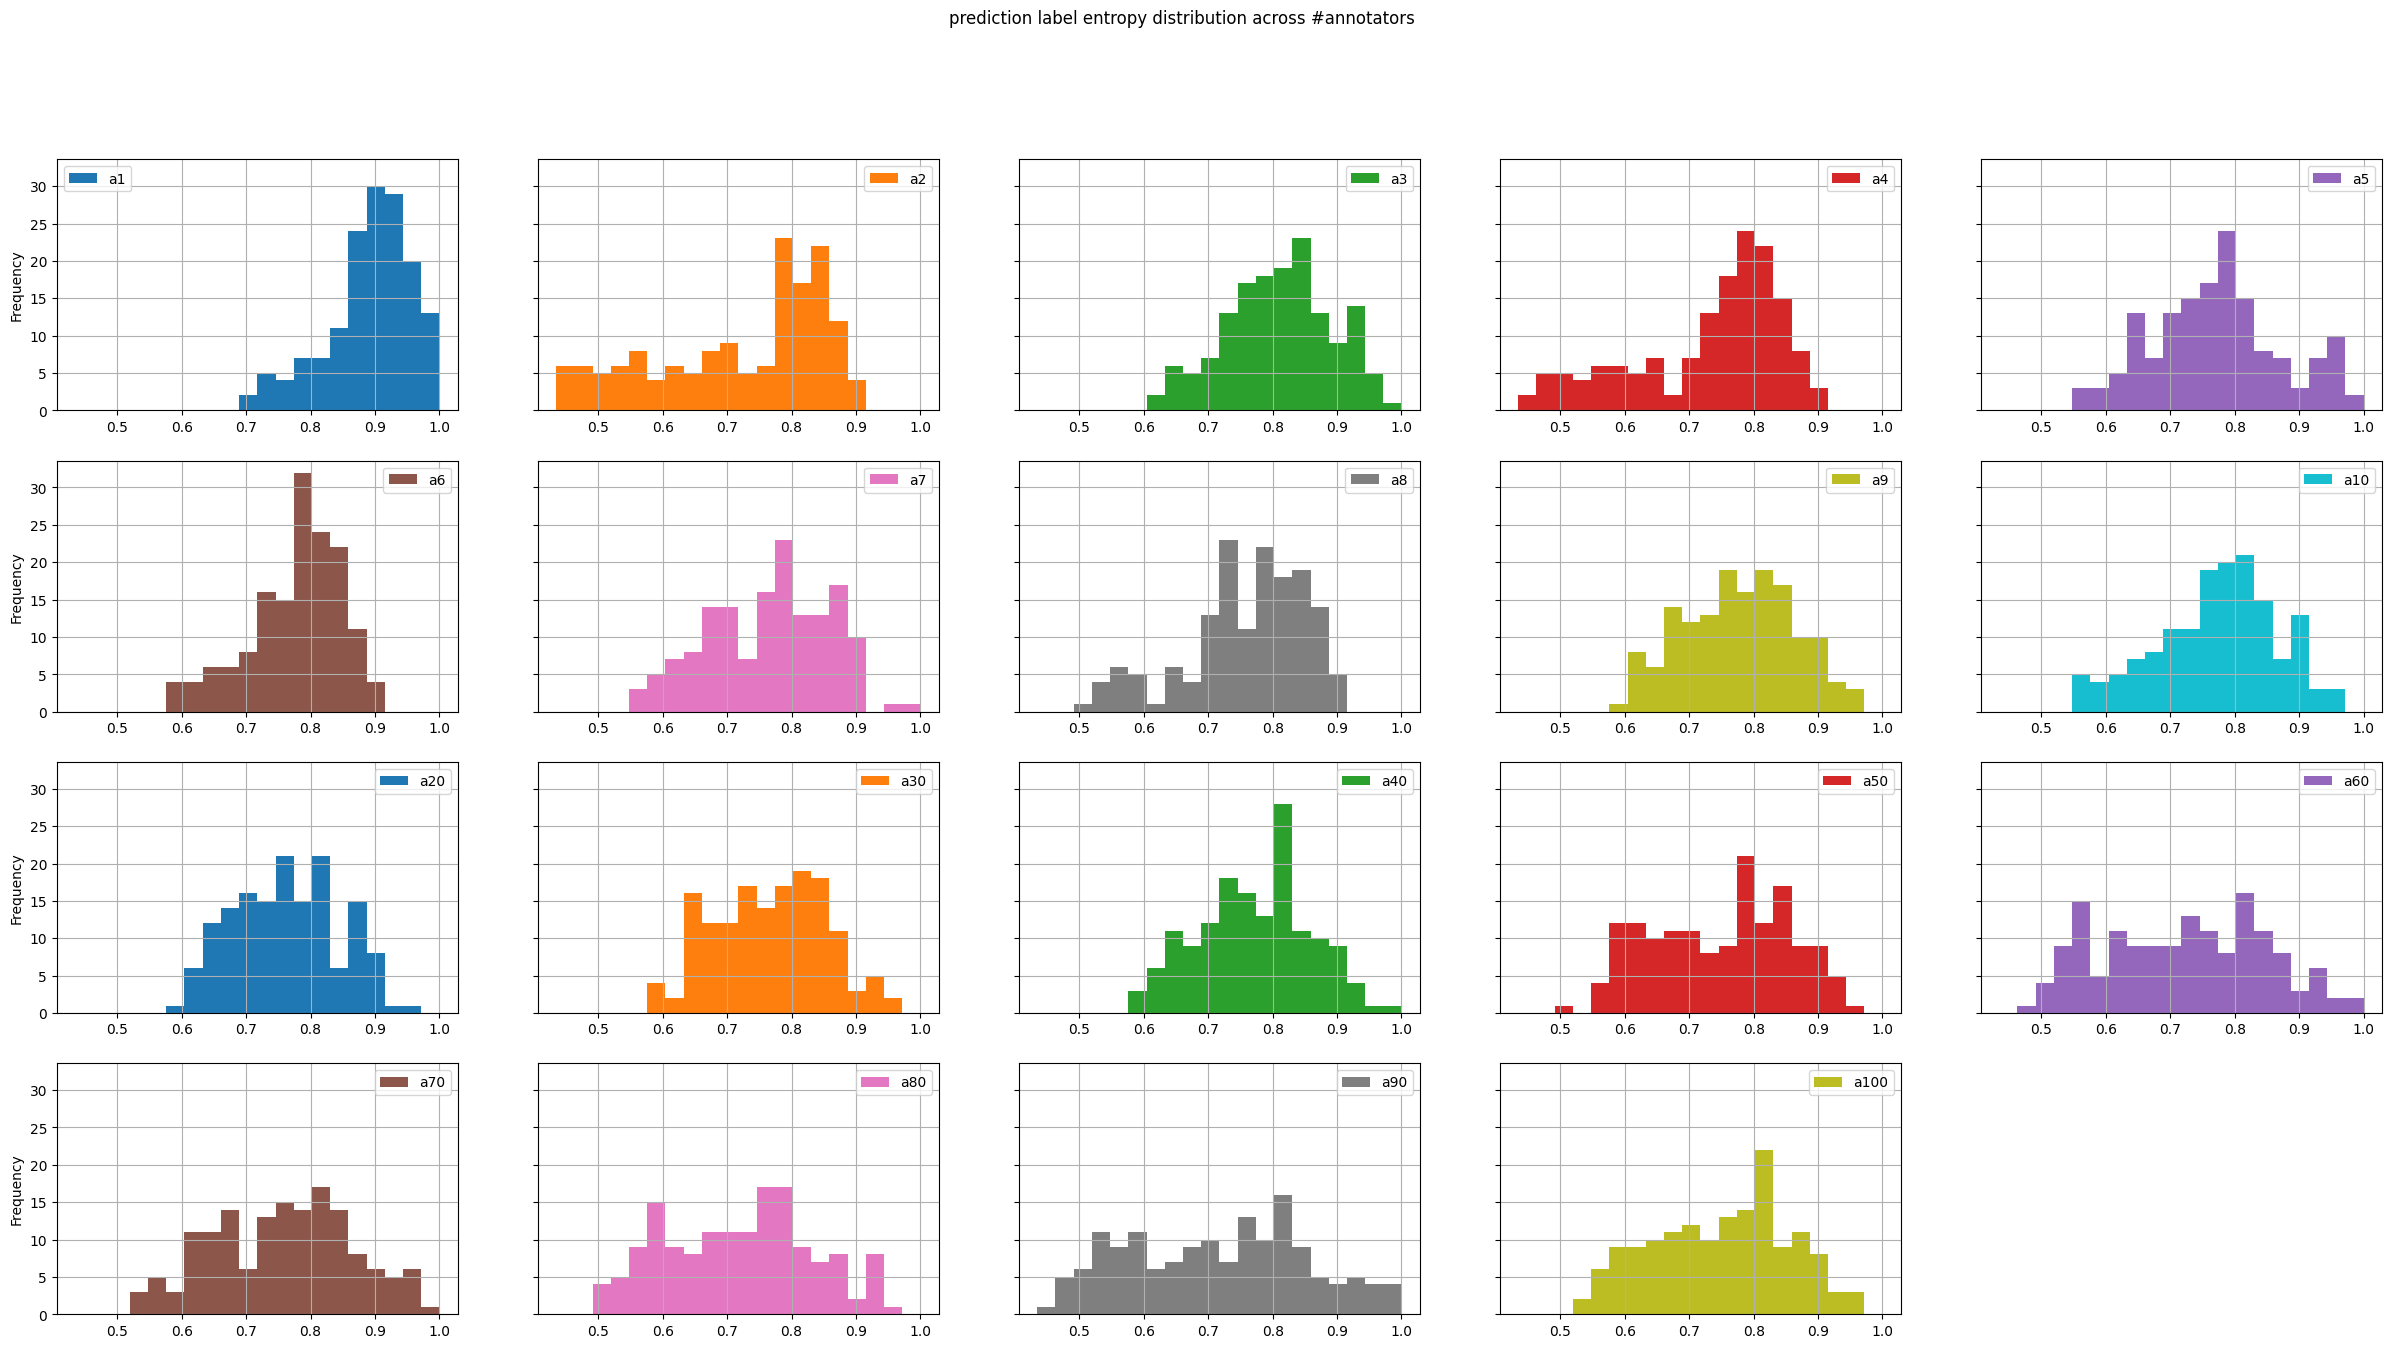

In [13]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
#df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_csnli_mean_entropy.plot(subplots=True, figsize=(30,15), kind="hist", layout=(4,5), sharey=True, sharex=False,
grid=True, bins=20, title="prediction label entropy distribution across #annotators" #, layout=(4,5)
)
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

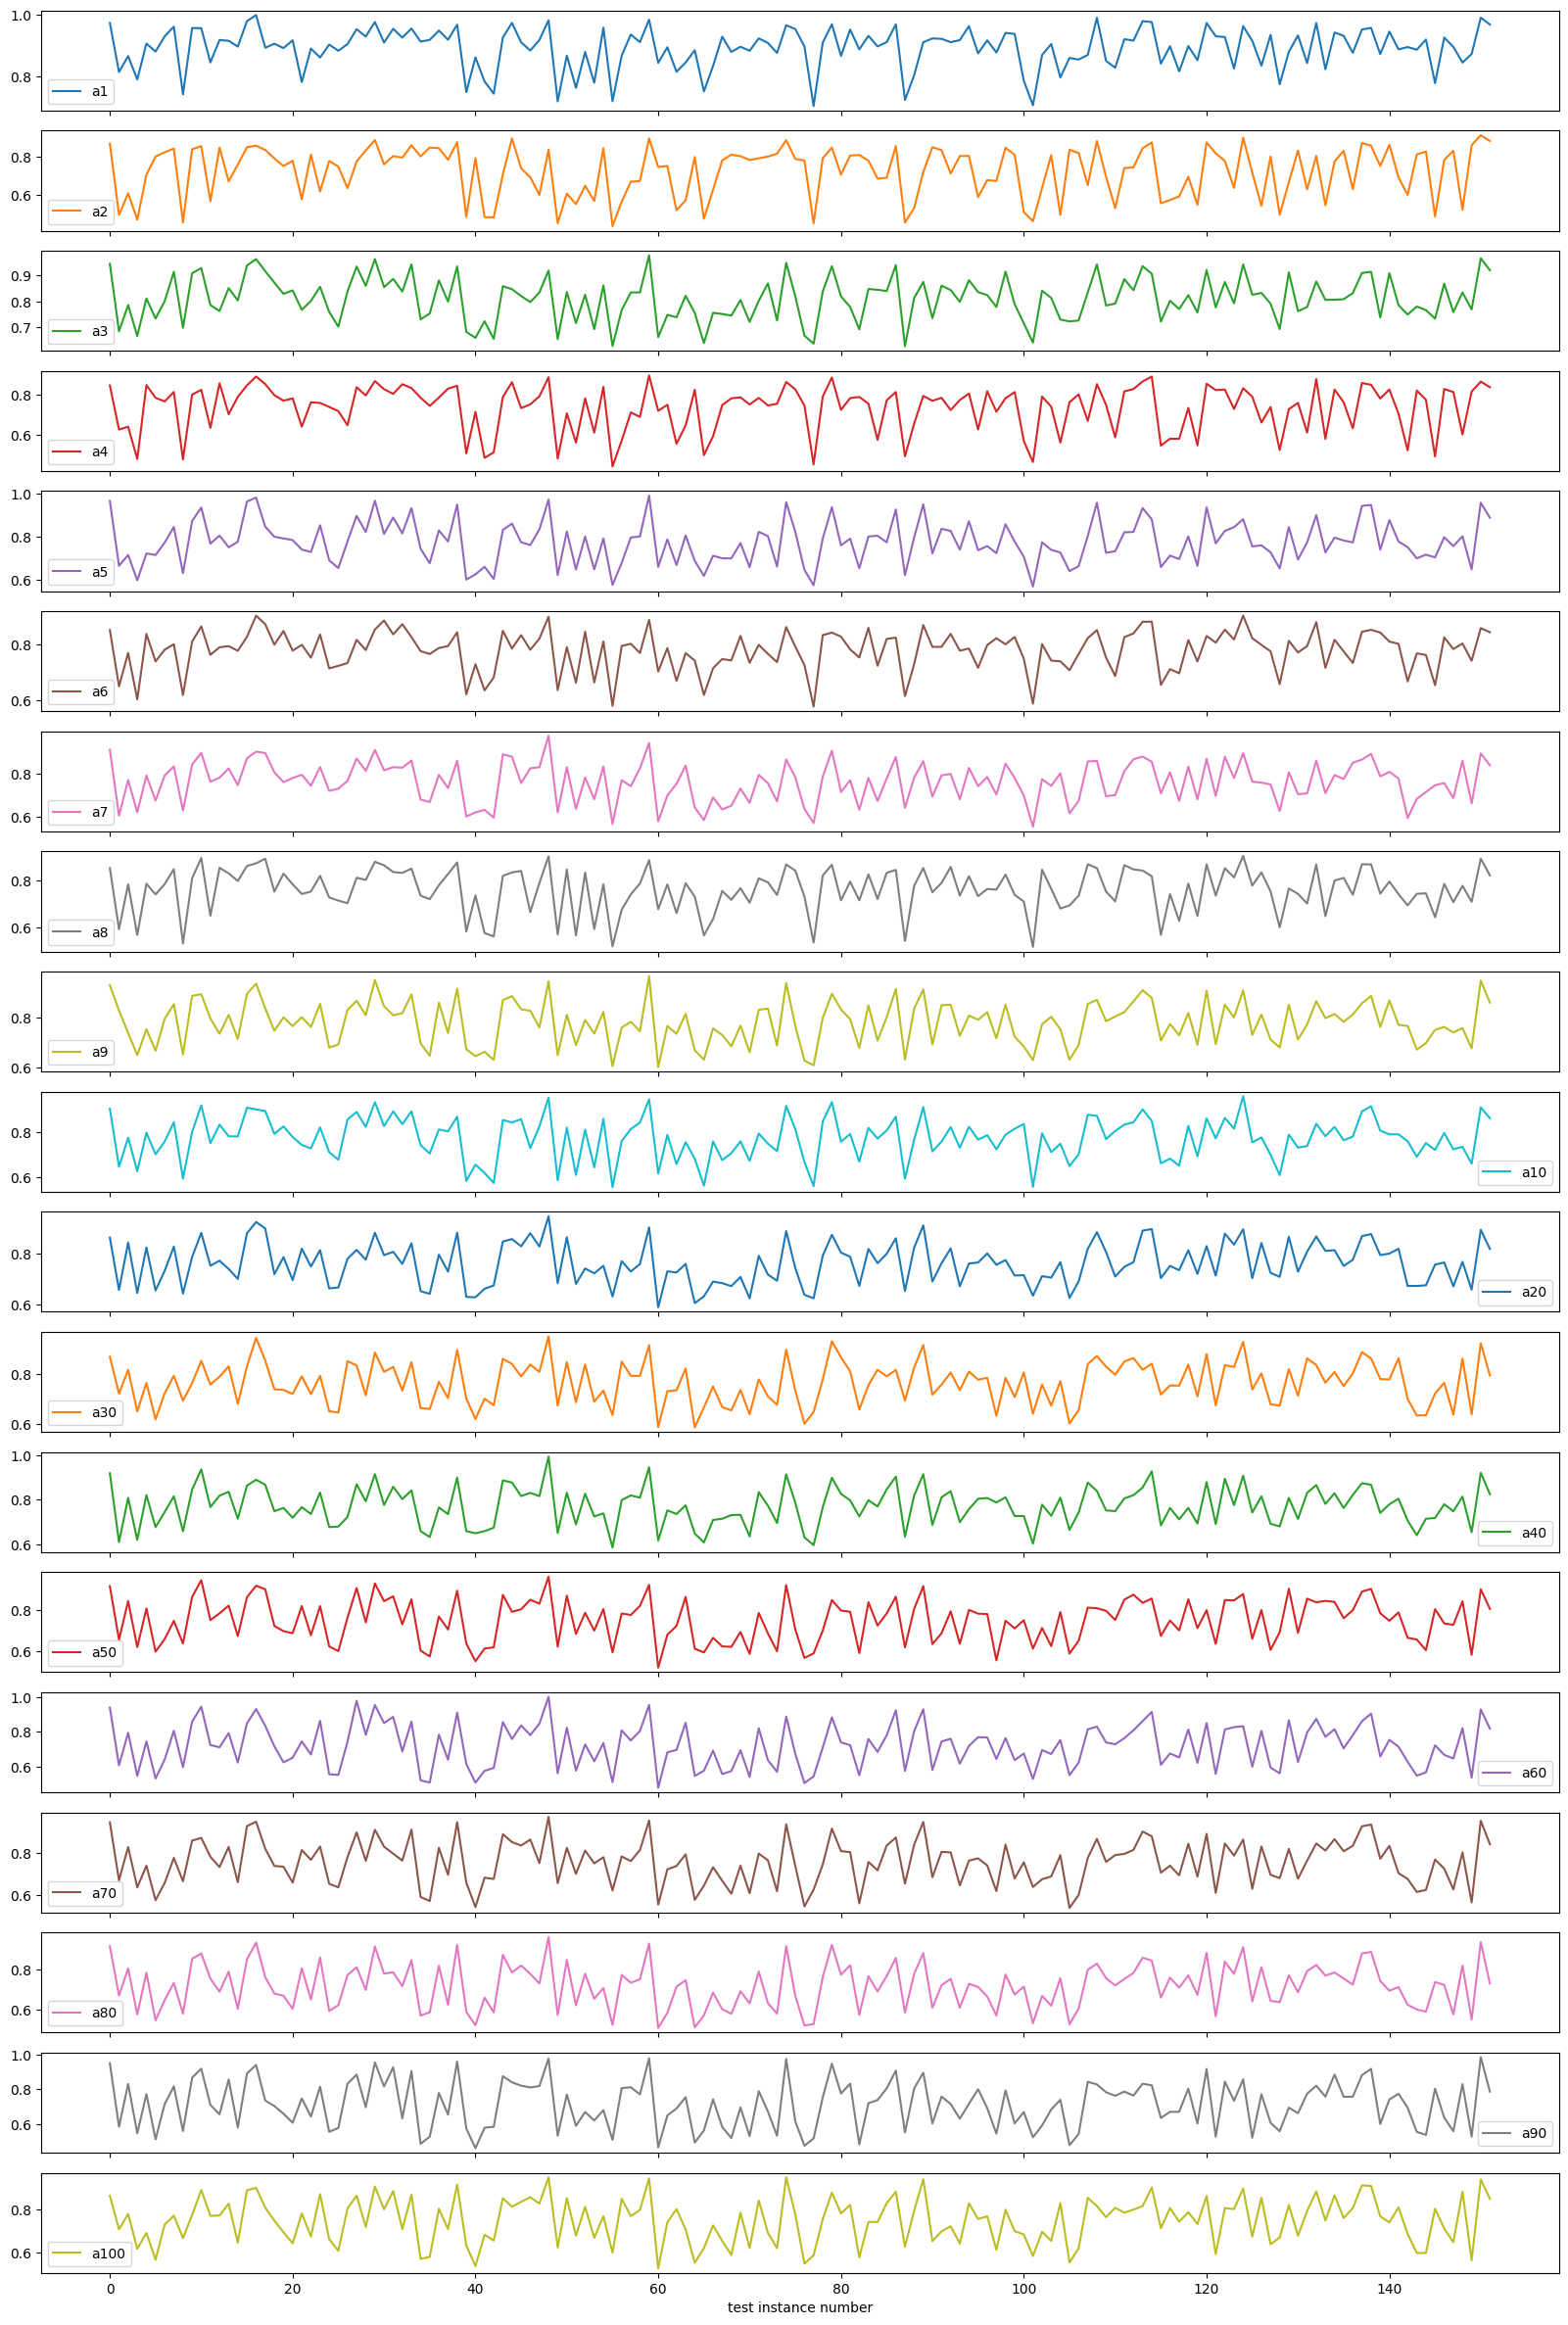

In [19]:
#df_ann_csnli_mean_entropy.columns.name = 'Type A'
df_ann_csnli_mean_entropy.index.name = 'test instance number'
df_ann_csnli_mean_entropy.plot(subplots=True, figsize=(20,30), sharex=True, sharey=False) #, figsize=(30,5), layout=(4,5)
#ax.set(xlabel="x label", ylabel="y label")
# plt.xlabel('instance')
#plt.ylabel('ylabel')
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

In [20]:
###################pretrained-smnli-cmnli####################

import pickle, json
from scipy.special import softmax
from scipy.stats import entropy as entropy


path="/home/pritam.k/research/hlv/models/all_results/results/"
afolders = os.listdir(path+'cmnli')

s = set(afolders)
files_sorted=[]
for x in sorted_nicely(s):
    files_sorted.append(x)

#print(files_sorted)
path="/home/pritam.k/research/hlv/models/all_results/results/"
ares_pkl=[]
for fname in files_sorted:
    sf = os.listdir(path+'cmnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    #print(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'cmnli/'+fname+'/results/'+d)
        path_1= path+'cmnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.pkl'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[0], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        elif file[1].endswith('.pkl'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[1], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        res.append([entropy(pf_probs[i]) for i in range(len(pf_probs))])
    ares_pkl.append(res)



ares_json=[]
for fname in files_sorted:
    sf = os.listdir(path+'cmnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'cmnli/'+fname+'/results/'+d)
        path_1= path+'cmnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.json'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[0]) as jfile:
                jf = json.load(jfile)
        elif file[1].endswith('.json'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[1]) as jfile:
                jf = json.load(jfile)
        res.append(jf['test_accuracy'])
    ares_json.append(res)

print(np.array(ares_pkl).shape)   
print(np.array(ares_json).shape)    

(19, 10, 160)
(19, 10)


In [21]:
df_ann_cmnli=pd.DataFrame(ares_json, index=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            columns=['set'+str(j) for j in range(1,11)])

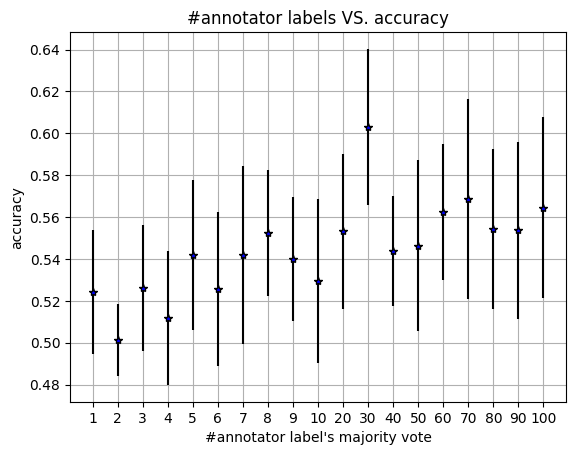

In [22]:
fig = plt.figure()
ax2  = fig.add_subplot(111)
plt.grid()
x = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
y = np.array(np.mean(ares_json, axis=1)) # Effectively y = x**2
e = np.array(np.std(ares_json, axis=1))
ax2.errorbar(x.astype('str'), y, e, color='k', markerfacecolor='blue', linestyle='None', marker='*')
ax2.set(
    title ="#annotator labels VS. accuracy",
    xlabel = "#annotator label's majority vote",
    ylabel = "accuracy")


#fig.savefig("ala.png", dpi=400)
plt.show()

In [23]:
df_ann_cmnli_mean_entropy=pd.DataFrame(np.transpose(np.mean(ares_pkl, axis=1)), columns=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            #index=['smnli-csnli-mean-entropy-across-annotators-per-instance'])
)

In [24]:
df_ann_cmnli_mean_entropy

a1        a2        a3        a4        a5        a6        a7  \
0    0.981813  0.846586  0.984982  0.983802  0.948013  0.991681  0.974991   
1    1.053597  0.924823  1.015480  1.015415  0.976879  1.016155  1.038975   
2    1.002633  0.852535  0.986914  0.934071  0.955808  0.905177  0.991259   
3    1.047932  0.918210  0.986656  1.002862  1.004386  0.987240  1.020089   
4    1.062318  0.921948  1.050410  1.005919  1.033550  0.990045  1.045120   
..        ...       ...       ...       ...       ...       ...       ...   
155  1.001446  0.809612  0.919140  0.936642  0.831250  0.911507  0.959062   
156  1.042912  0.914279  1.040035  0.992562  1.005273  0.994278  1.034643   
157  0.964328  0.797155  0.953351  0.950524  0.827220  0.915197  0.957735   
158  1.039041  0.984359  1.048449  1.028867  0.978772  1.019403  1.021484   
159  1.021669  0.900981  0.982901  0.965947  0.913991  0.866045  1.009773   

           a8        a9       a10       a20       a30       a40       a50  \
0    0.964417  0.900676  0.966491  0.968800  0.944901  1.004174  0.967823   
1    0.987862  0.927667  1.046999  0.983356  0.988830  1.017005  1.012538   
2    0.914974  0.917214  0.975730  0.933711  0.852908  0.953826  0.899110   
3    0.977419  0.980500  1.014463  0.986938  0.965281  1.017024  0.999887   
4    1.016698  1.035125  1.040173  1.020050  1.015931  1.049962  1.045755   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.858400  0.845722  0.887966  0.781503  0.715578  0.883737  0.778747   
156  1.008775  1.018805  1.024602  1.025688  0.953292  1.031447  1.040042   
157  0.765741  0.897012  0.871606  0.810290  0.680492  0.872726  0.853510   
158  0.992357  0.974925  0.924218  0.969412  0.923201  1.016226  0.981171   
159  0.868327  0.828644  0.962745  0.892212  0.620558  0.940062  0.854827   

          a60       a70       a80       a90      a100  
0    0.958670  0.971947  1.004709  0.957747  0.979821  
1    0.980802  0.958626  0.994153  1.019546  0.986497  
2    0.920635  0.900116  0.928362  0.956337  0.962500  
3    0.976615  0.995435  1.030642  1.015470  1.017215  
4    1.051878  1.035746  1.053531  1.044979  1.048286  
..        ...       ...       ...       ...       ...  
155  0.771610  0.857951  0.913276  0.776764  0.865892  
156  1.031879  1.011206  1.031625  1.034402  1.029138  
157  0.789550  0.782451  0.833241  0.958411  0.836545  
158  0.967609  0.955452  1.030050  0.981805  1.014996  
159  0.760458  0.830618  0.912122  0.876396  0.897660  

[160 rows x 19 columns]

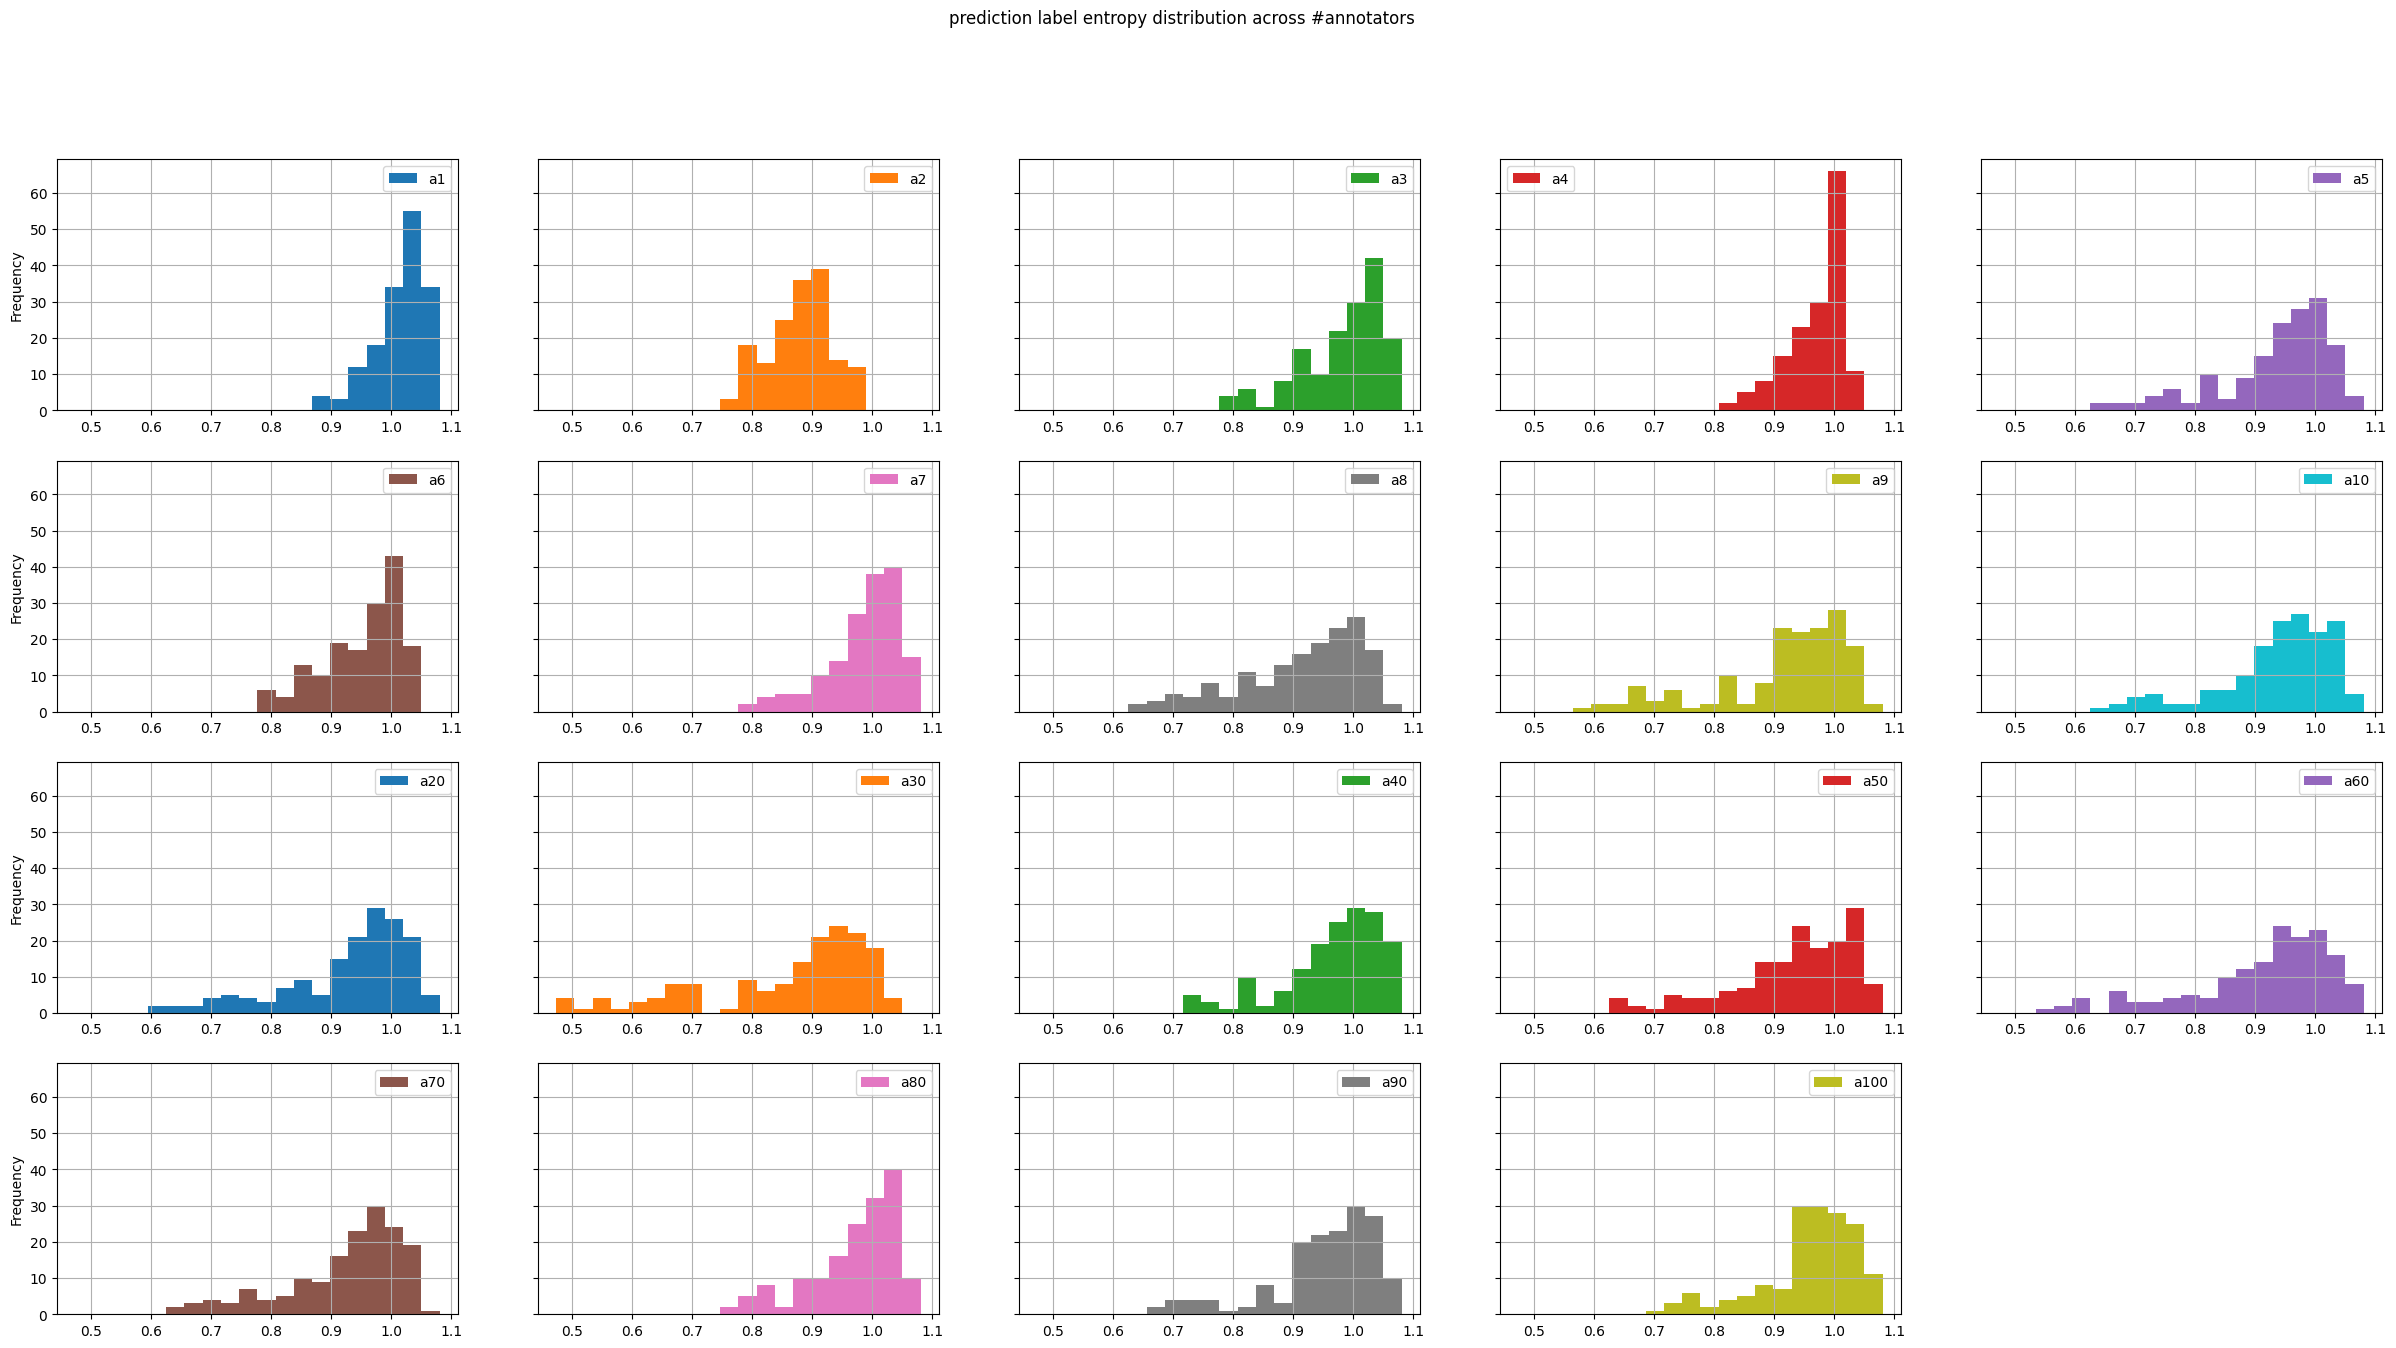

In [25]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
#df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_cmnli_mean_entropy.plot(subplots=True, figsize=(30,15), kind="hist", layout=(4,5), sharey=True, sharex=False,
grid=True, bins=20, title="prediction label entropy distribution across #annotators" #, layout=(4,5)
)
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

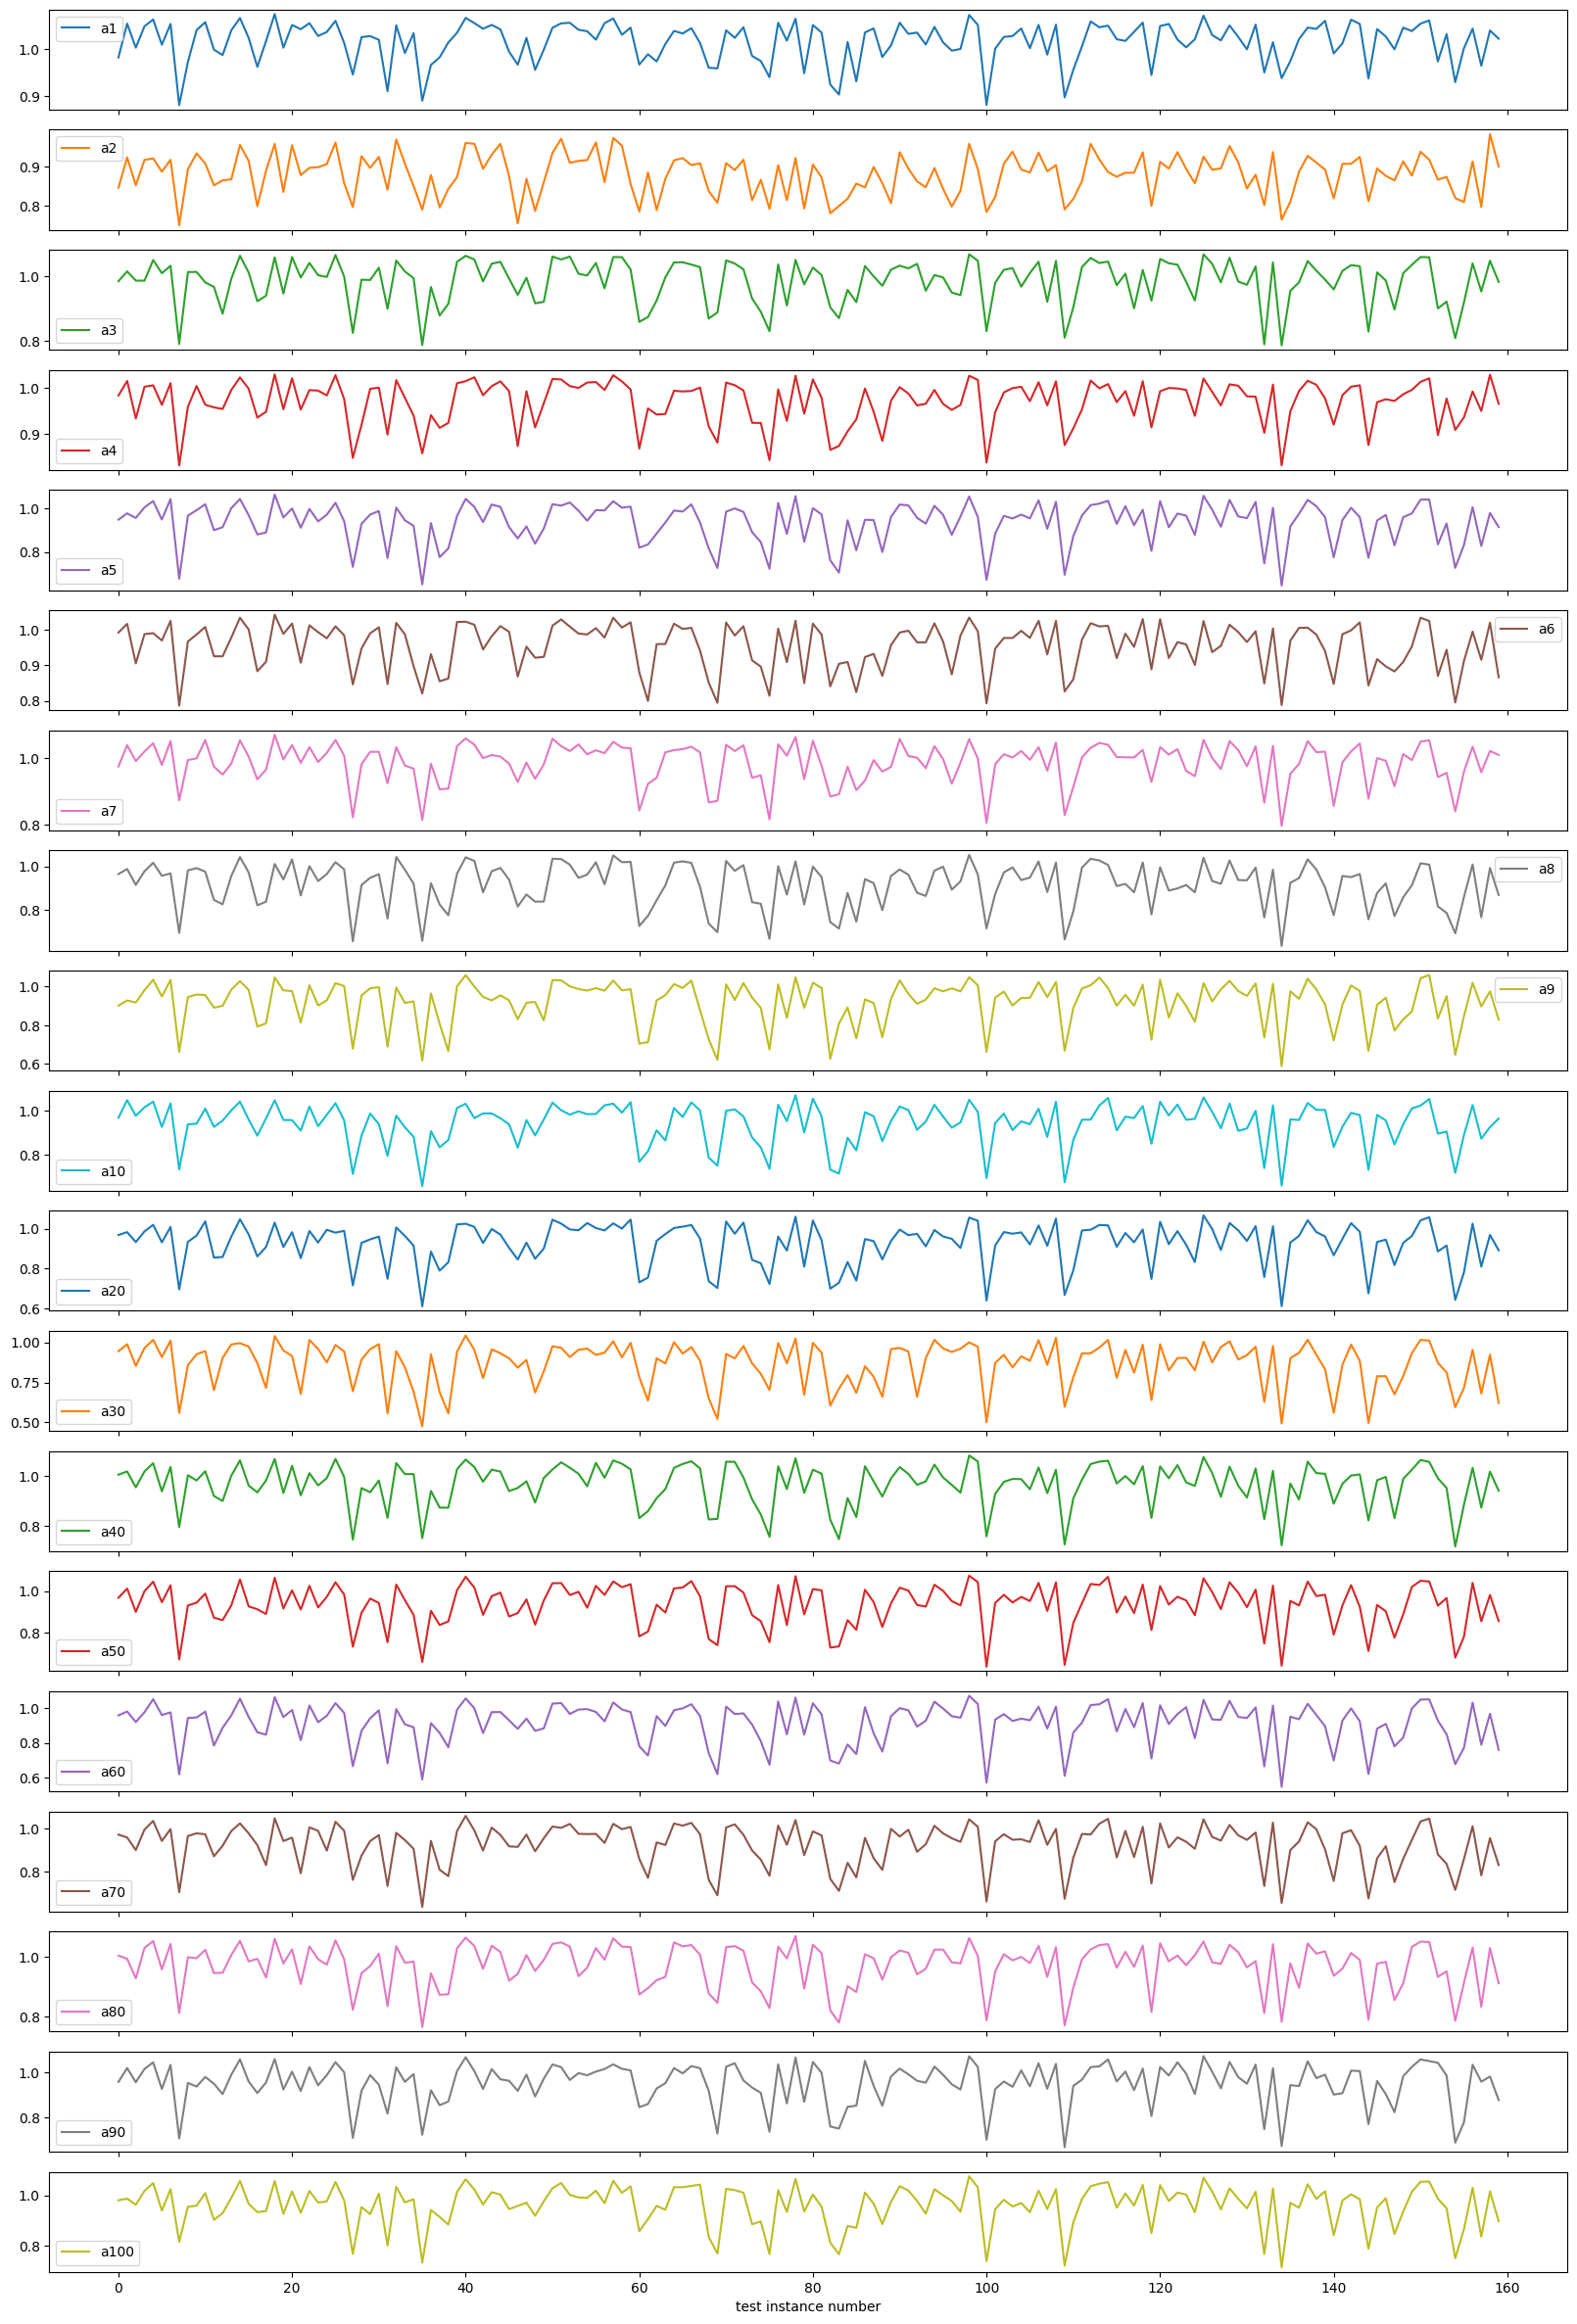

In [26]:
#df_ann_csnli_mean_entropy.columns.name = 'Type A'
df_ann_cmnli_mean_entropy.index.name = 'test instance number'
df_ann_cmnli_mean_entropy.plot(subplots=True, figsize=(20,30), sharex=True, sharey=False) #, figsize=(30,5), layout=(4,5)
#ax.set(xlabel="x label", ylabel="y label")
# plt.xlabel('instance')
#plt.ylabel('ylabel')
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

#pretrained-smnli-csnli

In [37]:
###################pretrained-smnli-csnli####################

import pickle, json
from scipy.special import softmax
from scipy.stats import entropy as entropy


path="/home/pritam.k/research/hlv/models/all_results/pretrained-smnli-results/"
afolders = os.listdir(path+'csnli')

s = set(afolders)
files_sorted=[]
for x in sorted_nicely(s):
    files_sorted.append(x)

path="/home/pritam.k/research/hlv/models/all_results/pretrained-smnli-results/"
ares_pkl=[]
for fname in files_sorted:
    sf = os.listdir(path+'csnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    #print(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'csnli/'+fname+'/results/'+d)
        path_1= path+'csnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.pkl'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[0], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        elif file[1].endswith('.pkl'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[1], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        res.append([entropy(pf_probs[i]) for i in range(len(pf_probs))])
    ares_pkl.append(res)



ares_json=[]
for fname in files_sorted:
    sf = os.listdir(path+'csnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'csnli/'+fname+'/results/'+d)
        path_1= path+'csnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.json'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[0]) as jfile:
                jf = json.load(jfile)
        elif file[1].endswith('.json'):
            with open(path+'csnli/'+fname+'/results/'+d+'/'+file[1]) as jfile:
                jf = json.load(jfile)
        res.append(jf['test_accuracy'])
    ares_json.append(res)

print(np.array(ares_pkl).shape)   
print(np.array(ares_json).shape)    

(19, 10, 152)
(19, 10)


In [38]:
df_ann_smnli=pd.DataFrame(ares_json, index=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            columns=['set'+str(j) for j in range(1,11)])

In [39]:
df_ann_smnli

set1      set2      set3      set4      set5      set6      set7  \
a1    0.703947  0.776316  0.750000  0.750000  0.750000  0.730263  0.756579   
a2    0.717105  0.723684  0.743421  0.723684  0.736842  0.730263  0.717105   
a3    0.730263  0.750000  0.736842  0.730263  0.730263  0.750000  0.736842   
a4    0.756579  0.750000  0.756579  0.730263  0.750000  0.756579  0.750000   
a5    0.750000  0.769737  0.743421  0.736842  0.750000  0.750000  0.730263   
a6    0.743421  0.756579  0.750000  0.743421  0.743421  0.730263  0.730263   
a7    0.736842  0.750000  0.723684  0.756579  0.736842  0.750000  0.717105   
a8    0.736842  0.763158  0.730263  0.789474  0.736842  0.730263  0.723684   
a9    0.750000  0.717105  0.763158  0.730263  0.736842  0.730263  0.743421   
a10   0.750000  0.743421  0.763158  0.736842  0.730263  0.763158  0.769737   
a20   0.730263  0.743421  0.736842  0.743421  0.730263  0.723684  0.743421   
a30   0.736842  0.730263  0.756579  0.723684  0.723684  0.743421  0.730263   
a40   0.743421  0.730263  0.730263  0.730263  0.750000  0.730263  0.743421   
a50   0.736842  0.736842  0.730263  0.750000  0.723684  0.756579  0.736842   
a60   0.743421  0.750000  0.736842  0.730263  0.723684  0.763158  0.723684   
a70   0.736842  0.723684  0.736842  0.750000  0.743421  0.736842  0.723684   
a80   0.736842  0.723684  0.723684  0.736842  0.756579  0.736842  0.710526   
a90   0.750000  0.730263  0.743421  0.743421  0.736842  0.736842  0.717105   
a100  0.736842  0.750000  0.743421  0.743421  0.736842  0.730263  0.756579   

          set8      set9     set10  
a1    0.763158  0.750000  0.763158  
a2    0.743421  0.743421  0.763158  
a3    0.769737  0.723684  0.756579  
a4    0.736842  0.736842  0.730263  
a5    0.743421  0.730263  0.743421  
a6    0.750000  0.750000  0.743421  
a7    0.750000  0.710526  0.743421  
a8    0.723684  0.763158  0.736842  
a9    0.743421  0.717105  0.723684  
a10   0.743421  0.730263  0.743421  
a20   0.736842  0.723684  0.710526  
a30   0.736842  0.743421  0.723684  
a40   0.723684  0.750000  0.736842  
a50   0.710526  0.723684  0.723684  
a60   0.736842  0.717105  0.723684  
a70   0.743421  0.750000  0.730263  
a80   0.736842  0.743421  0.723684  
a90   0.736842  0.743421  0.750000  
a100  0.730263  0.750000  0.750000

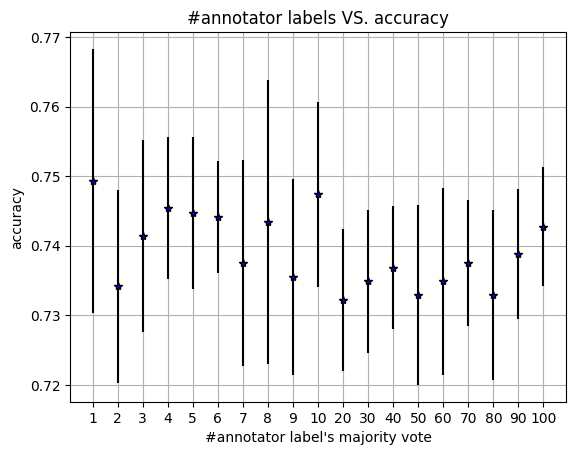

In [40]:
fig = plt.figure()
ax2  = fig.add_subplot(111)
plt.grid()
x = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
y = np.array(np.mean(ares_json, axis=1)) # Effectively y = x**2
e = np.array(np.std(ares_json, axis=1))
ax2.errorbar(x.astype('str'), y, e, color='k', markerfacecolor='blue', linestyle='None', marker='*')
ax2.set(
    title ="#annotator labels VS. accuracy",
    xlabel = "#annotator label's majority vote",
    ylabel = "accuracy")


#fig.savefig("ala.png", dpi=400)
plt.show()

In [41]:
df_ann_smnli_mean_entropy=pd.DataFrame(np.transpose(np.mean(ares_pkl, axis=1)), columns=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            #index=['smnli-csnli-mean-entropy-across-annotators-per-instance'])
)

In [42]:
df_ann_smnli_mean_entropy

a1        a2        a3        a4        a5        a6        a7  \
0    0.245119  0.301194  0.146902  0.232229  0.100328  0.156051  0.162496   
1    0.668438  0.471251  0.618386  0.472701  0.574704  0.531390  0.660658   
2    0.817453  0.670300  0.794786  0.741023  0.734771  0.721739  0.776608   
3    0.905678  0.797582  0.904179  0.758494  0.677243  0.748929  0.897169   
4    0.168469  0.169764  0.100248  0.135025  0.070391  0.078355  0.106505   
..        ...       ...       ...       ...       ...       ...       ...   
147  0.213295  0.172687  0.161961  0.140496  0.084444  0.070278  0.113719   
148  0.729049  0.473798  0.763129  0.585328  0.573854  0.628878  0.694946   
149  0.610101  0.666067  0.451467  0.647663  0.261018  0.385423  0.353265   
150  0.362637  0.493307  0.356201  0.407087  0.248619  0.311947  0.368955   
151  0.420445  0.186278  0.362730  0.216846  0.259949  0.196252  0.328121   

           a8        a9       a10       a20       a30       a40       a50  \
0    0.190524  0.172888  0.149284  0.070099  0.072002  0.073784  0.083698   
1    0.561181  0.705654  0.595378  0.541247  0.632460  0.585028  0.565791   
2    0.777713  0.803910  0.727620  0.693183  0.702769  0.749219  0.746240   
3    0.915949  0.856689  0.791858  0.670345  0.746049  0.746565  0.790061   
4    0.101108  0.110661  0.076282  0.046503  0.050812  0.051490  0.054569   
..        ...       ...       ...       ...       ...       ...       ...   
147  0.135824  0.108246  0.075110  0.059418  0.077774  0.069407  0.077182   
148  0.731103  0.696093  0.713301  0.555523  0.625144  0.594215  0.638829   
149  0.444475  0.339510  0.299692  0.193761  0.237294  0.213564  0.229491   
150  0.378637  0.369385  0.346320  0.207766  0.246015  0.232081  0.252649   
151  0.270932  0.289668  0.213899  0.176114  0.204404  0.204894  0.214164   

          a60       a70       a80       a90      a100  
0    0.131368  0.108067  0.113576  0.106025  0.104392  
1    0.716799  0.670656  0.694659  0.701487  0.681594  
2    0.829184  0.772857  0.799698  0.812222  0.783963  
3    0.983622  0.871903  0.899948  0.983579  0.889350  
4    0.078319  0.067279  0.070996  0.061974  0.060216  
..        ...       ...       ...       ...       ...  
147  0.122667  0.105399  0.110244  0.104439  0.105311  
148  0.753856  0.711536  0.719179  0.726710  0.725143  
149  0.345641  0.288136  0.305970  0.309378  0.285444  
150  0.352928  0.312894  0.315794  0.331263  0.329277  
151  0.341625  0.289354  0.294738  0.306115  0.296846  

[152 rows x 19 columns]

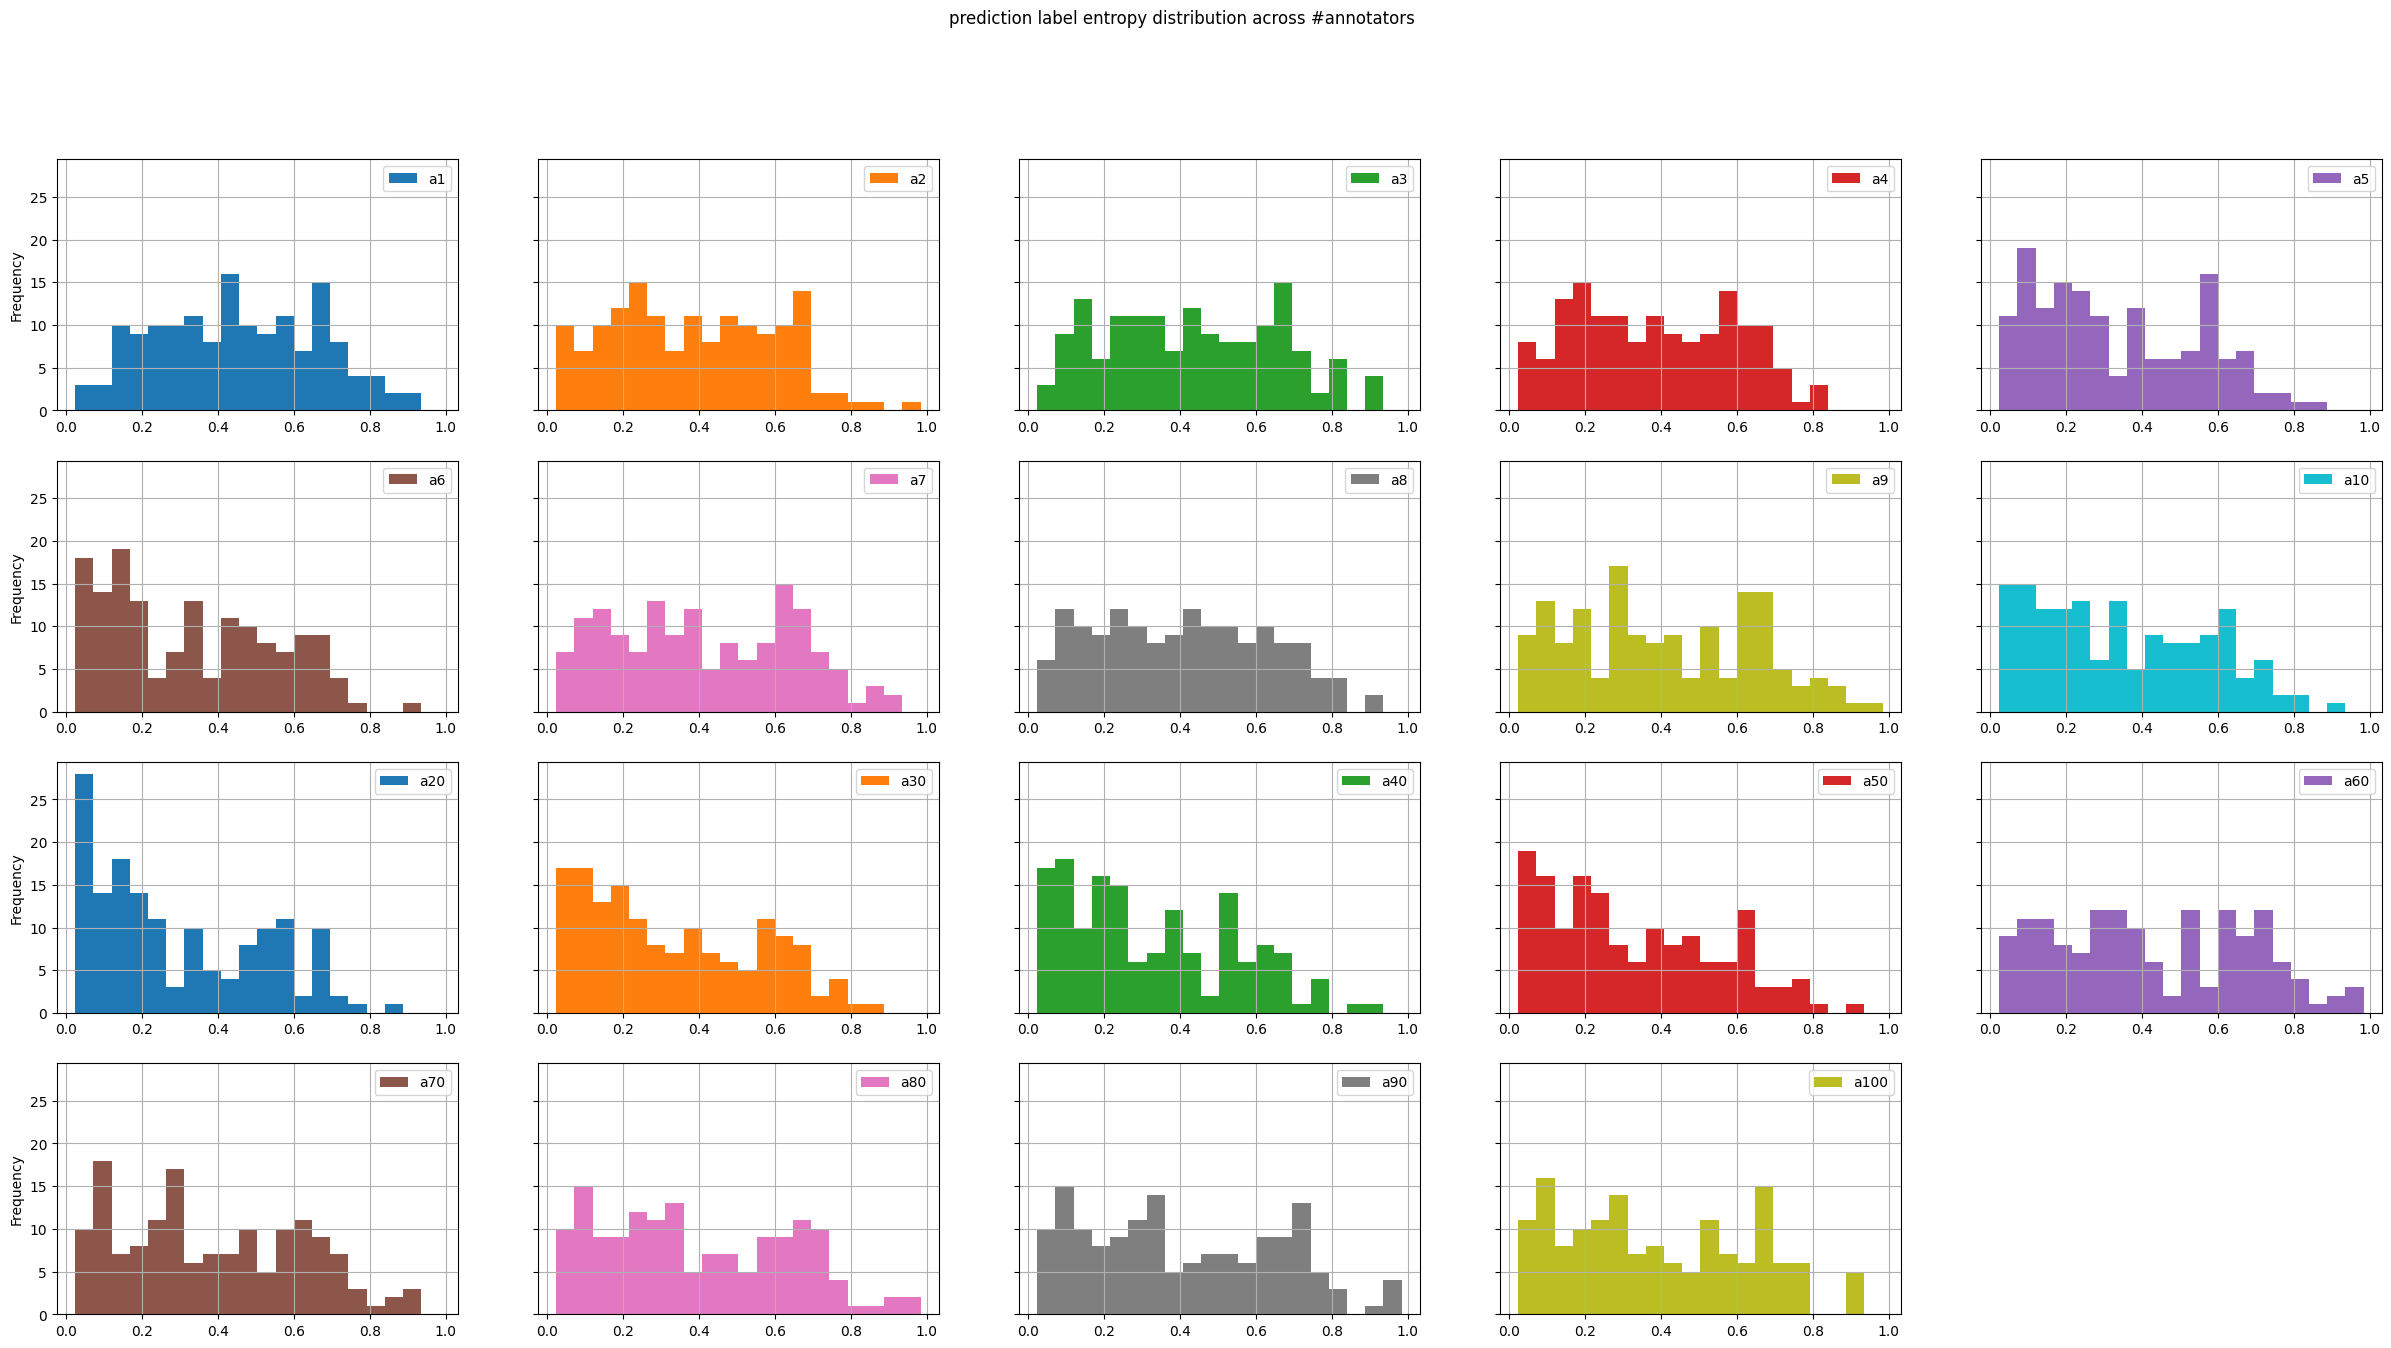

In [43]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
#df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_smnli_mean_entropy.plot(subplots=True, figsize=(30,15), kind="hist", layout=(4,5), sharey=True, sharex=False,
grid=True, bins=20, title="prediction label entropy distribution across #annotators" #, layout=(4,5)
)
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

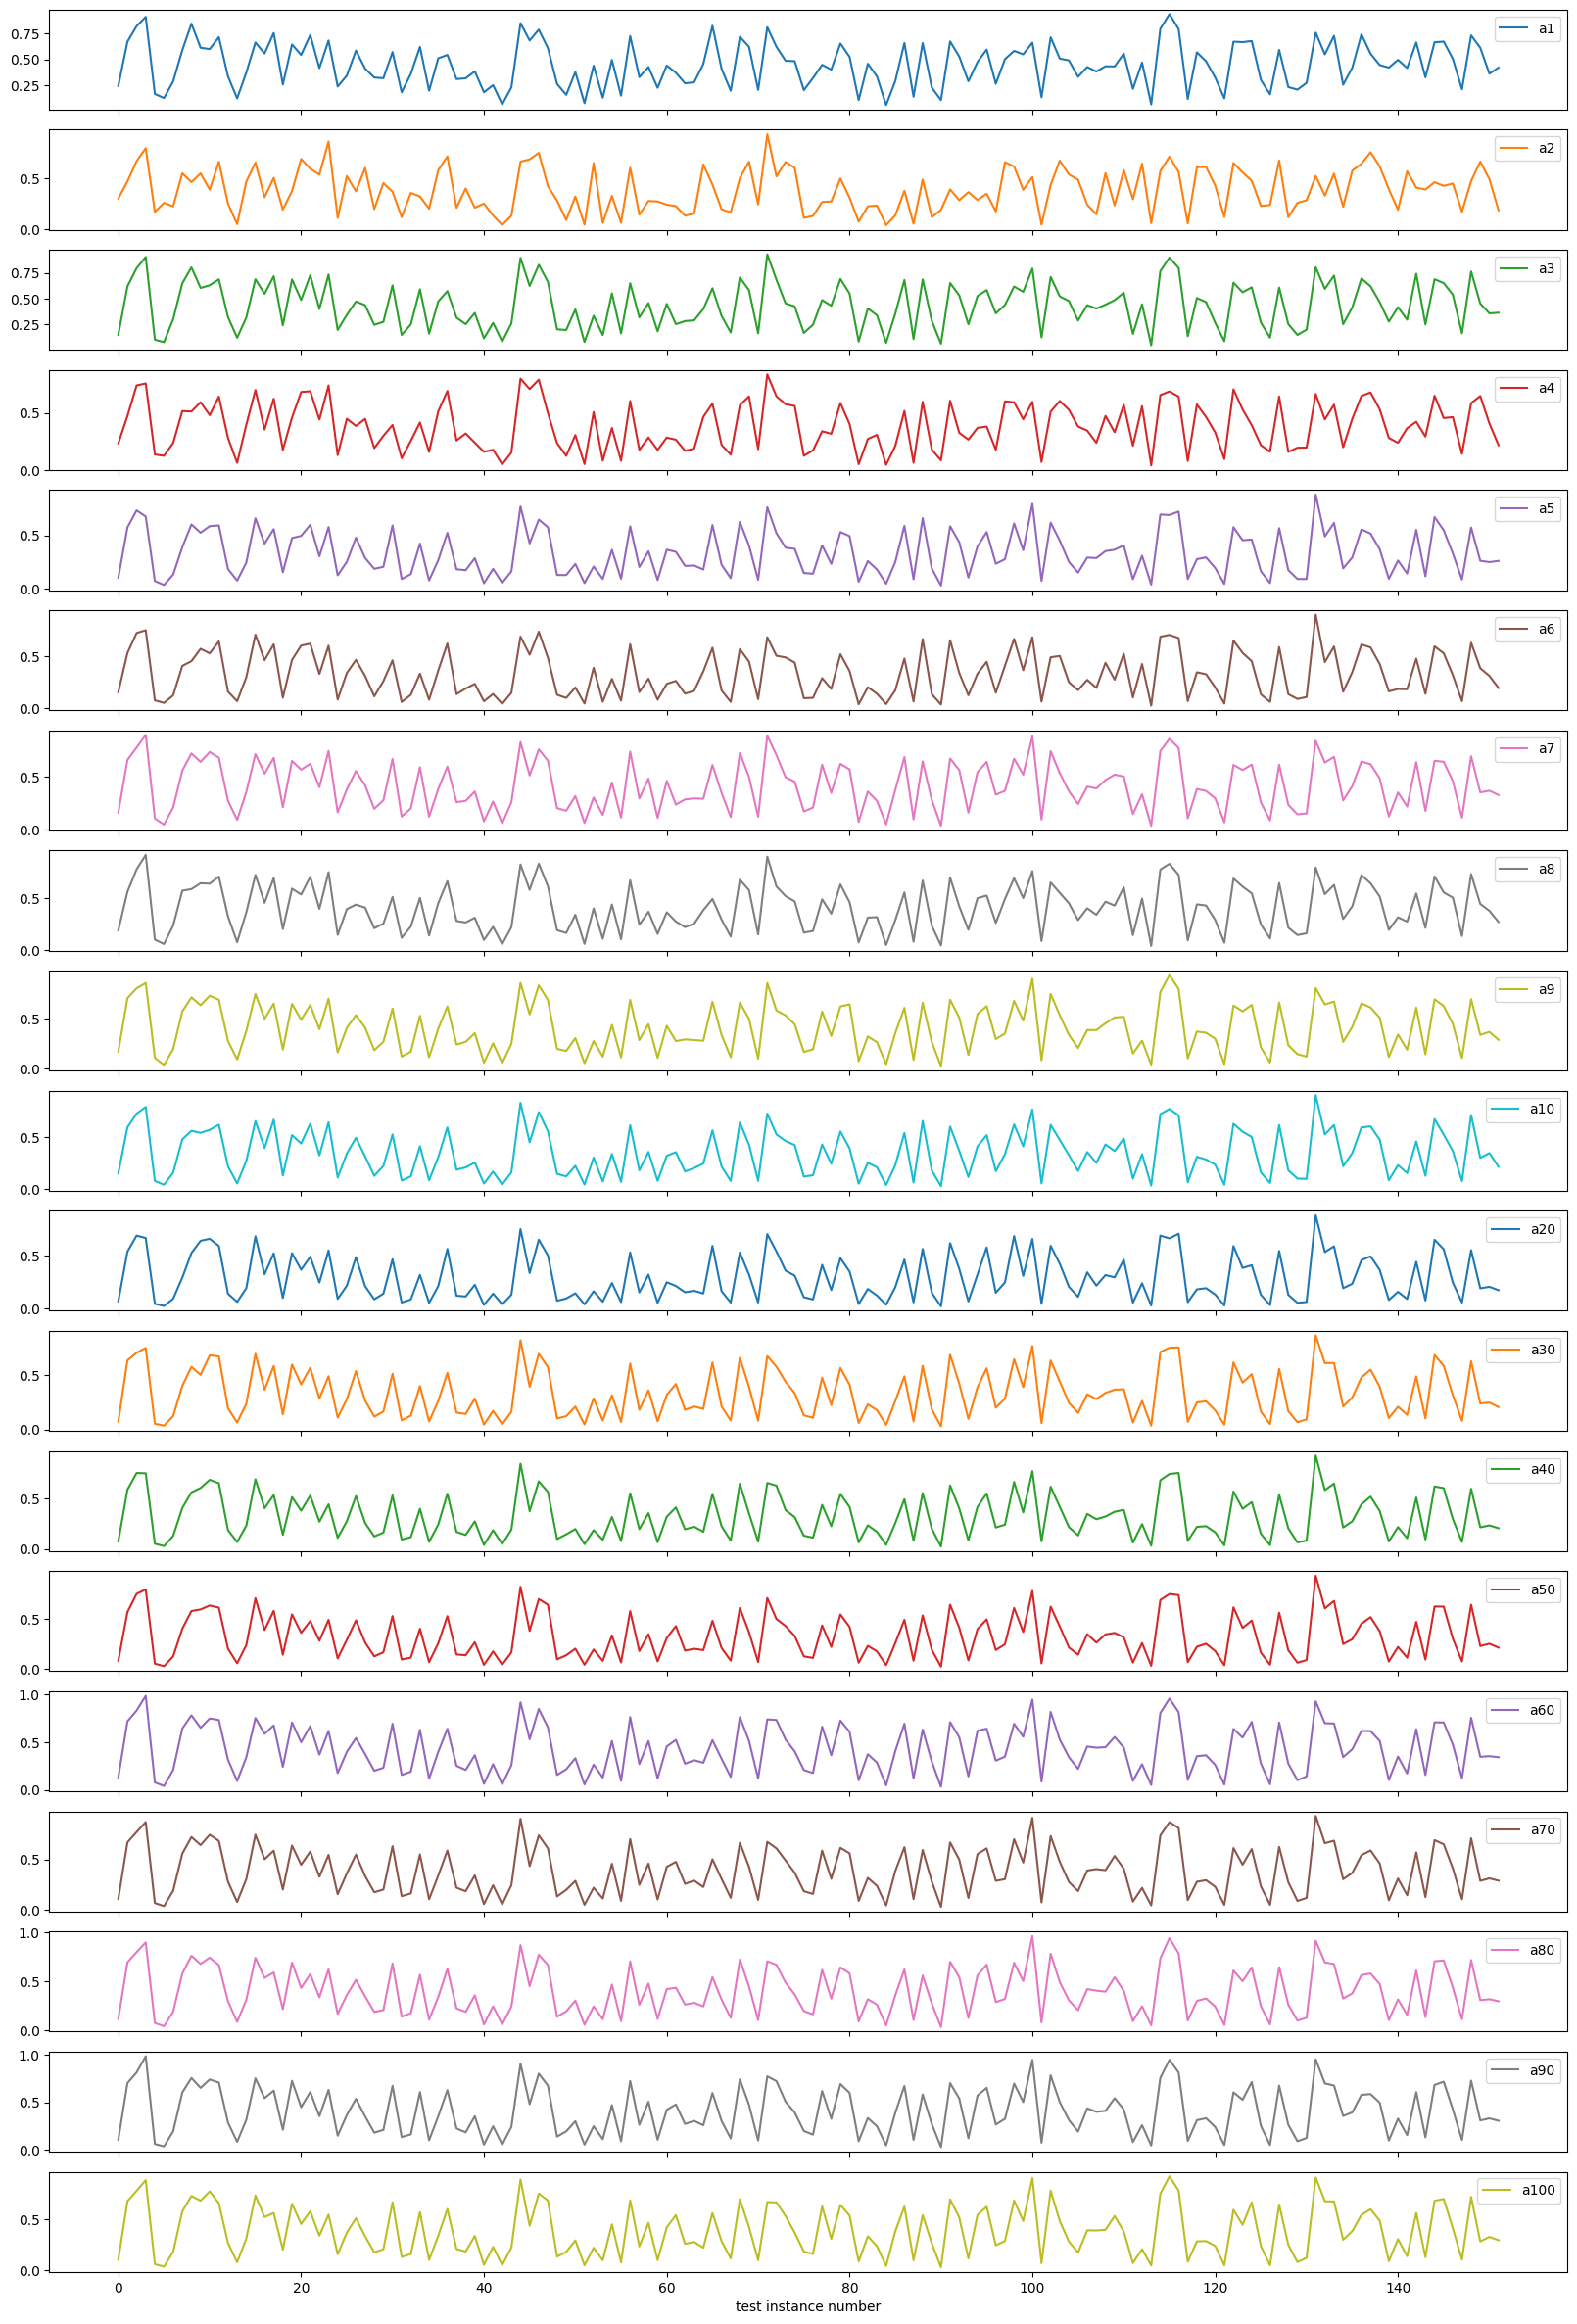

In [33]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_smnli_mean_entropy.plot(subplots=True, figsize=(20,30), sharex=True, sharey=False) #, layout=(4,5)
#ax.set(xlabel="x label", ylabel="y label")
# plt.xlabel('instance')
#plt.ylabel('ylabel')
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

#pretrained-smnli-cmnli

In [44]:
###################pretrained-smnli-csnli####################

import pickle, json
from scipy.special import softmax
from scipy.stats import entropy as entropy


path="/home/pritam.k/research/hlv/models/all_results/pretrained-smnli-results/"
afolders = os.listdir(path+'cmnli')

s = set(afolders)
files_sorted=[]
for x in sorted_nicely(s):
    files_sorted.append(x)

path="/home/pritam.k/research/hlv/models/all_results/pretrained-smnli-results/"
ares_pkl=[]
for fname in files_sorted:
    sf = os.listdir(path+'cmnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    #print(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'cmnli/'+fname+'/results/'+d)
        path_1= path+'cmnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.pkl'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[0], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        elif file[1].endswith('.pkl'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[1], "rb") as pfile:
                pf = pickle.load(pfile)
                pf_probs = softmax(pf[0], axis=1)
        res.append([entropy(pf_probs[i]) for i in range(len(pf_probs))])
    ares_pkl.append(res)



ares_json=[]
for fname in files_sorted:
    sf = os.listdir(path+'cmnli/'+fname+'/results/')
    sf=sorted_nicely(sf)
    res=[]
    for d in sf:
        ssf = os.listdir(path+'cmnli/'+fname+'/results/'+d)
        path_1= path+'cmnli/'+fname+'/results/'+d+'/'
        file=os.listdir(path_1)
        if file[0].endswith('.json'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[0]) as jfile:
                jf = json.load(jfile)
        elif file[1].endswith('.json'):
            with open(path+'cmnli/'+fname+'/results/'+d+'/'+file[1]) as jfile:
                jf = json.load(jfile)
        res.append(jf['test_accuracy'])
    ares_json.append(res)

print(np.array(ares_pkl).shape)   
print(np.array(ares_json).shape)    

(19, 10, 160)
(19, 10)


In [45]:
df_ann_smnli=pd.DataFrame(ares_json, index=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            columns=['set'+str(j) for j in range(1,11)])

In [46]:
df_ann_smnli

set1     set2     set3     set4     set5     set6     set7     set8  \
a1    0.71250  0.71250  0.68750  0.68750  0.71250  0.71875  0.68125  0.70625   
a2    0.66875  0.76250  0.76250  0.73750  0.71875  0.75000  0.73750  0.73750   
a3    0.69375  0.75000  0.73750  0.71250  0.70625  0.71250  0.69375  0.73125   
a4    0.74375  0.72500  0.74375  0.73125  0.70625  0.75625  0.73125  0.78125   
a5    0.73125  0.70625  0.71250  0.73750  0.74375  0.72500  0.71875  0.71250   
a6    0.75000  0.72500  0.71875  0.76250  0.72500  0.76250  0.73125  0.76250   
a7    0.70625  0.73750  0.73125  0.74375  0.73750  0.70625  0.74375  0.75000   
a8    0.72500  0.75000  0.70000  0.72500  0.73125  0.74375  0.68750  0.69375   
a9    0.72500  0.70625  0.71250  0.77500  0.71875  0.72500  0.76875  0.71875   
a10   0.73750  0.74375  0.74375  0.72500  0.73125  0.71875  0.71250  0.74375   
a20   0.75625  0.71875  0.71875  0.75000  0.72500  0.75000  0.71250  0.75625   
a30   0.71250  0.75000  0.70625  0.75000  0.75000  0.75000  0.74375  0.71875   
a40   0.68750  0.71250  0.71875  0.67500  0.75625  0.71875  0.73750  0.71875   
a50   0.76875  0.73750  0.73125  0.71250  0.73125  0.71875  0.71875  0.71250   
a60   0.71250  0.70000  0.71875  0.72500  0.71250  0.75000  0.70625  0.71250   
a70   0.72500  0.71250  0.71250  0.71875  0.70625  0.75000  0.74375  0.75000   
a80   0.75000  0.76250  0.70625  0.71250  0.71250  0.71250  0.75625  0.70000   
a90   0.71875  0.70625  0.73750  0.70625  0.71875  0.72500  0.69375  0.73750   
a100  0.73750  0.71875  0.75625  0.70625  0.75000  0.73750  0.76875  0.74375   

         set9    set10  
a1    0.70625  0.71875  
a2    0.71875  0.73750  
a3    0.73125  0.69375  
a4    0.75625  0.73750  
a5    0.73750  0.71875  
a6    0.76250  0.75000  
a7    0.73125  0.71250  
a8    0.73125  0.73125  
a9    0.71250  0.68125  
a10   0.71875  0.75625  
a20   0.76250  0.73750  
a30   0.71250  0.71875  
a40   0.73125  0.75000  
a50   0.73750  0.71250  
a60   0.71250  0.71875  
a70   0.71250  0.75000  
a80   0.72500  0.71875  
a90   0.75625  0.72500  
a100  0.73750  0.70625

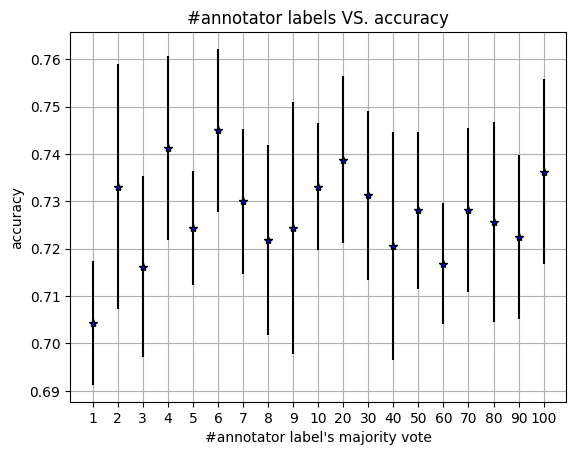

In [47]:
fig = plt.figure()
ax2  = fig.add_subplot(111)
plt.grid()
x = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
y = np.array(np.mean(ares_json, axis=1)) # Effectively y = x**2
e = np.array(np.std(ares_json, axis=1))
ax2.errorbar(x.astype('str'), y, e, color='k', markerfacecolor='blue', linestyle='None', marker='*')
ax2.set(
    title ="#annotator labels VS. accuracy",
    xlabel = "#annotator label's majority vote",
    ylabel = "accuracy")


#fig.savefig("ala.png", dpi=400)
plt.show()

In [48]:
df_ann_smnli_mean_entropy=pd.DataFrame(np.transpose(np.mean(ares_pkl, axis=1)), columns=['a'+str(i) for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]], 
                            #index=['smnli-csnli-mean-entropy-across-annotators-per-instance'])
)

In [49]:
df_ann_smnli_mean_entropy

a1        a2        a3        a4        a5        a6        a7  \
0    0.907293  1.011345  0.844714  0.792806  0.809735  0.781793  0.631513   
1    1.060397  0.910440  1.026033  1.050460  1.041094  1.075967  1.059024   
2    0.507577  0.225802  0.362941  0.173692  0.273918  0.195942  0.147360   
3    0.733111  0.649444  0.663317  0.568995  0.621504  0.565979  0.494180   
4    0.862441  0.684481  0.801612  0.582145  0.710285  0.552433  0.516866   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.915606  0.524238  0.732828  0.478424  0.666418  0.525834  0.575523   
156  0.907059  0.879743  0.764553  0.674029  0.685614  0.576887  0.460541   
157  0.995036  0.873370  0.971186  0.856260  0.927743  0.808417  0.818628   
158  0.953157  0.745629  0.871447  0.641111  0.750599  0.633288  0.628288   
159  0.588785  0.270989  0.451238  0.236247  0.345244  0.238288  0.194171   

           a8        a9       a10       a20       a30       a40       a50  \
0    0.872397  0.836769  0.857517  0.734145  0.785371  0.727675  0.787999   
1    1.065392  1.053660  1.044766  1.065018  1.065397  1.035724  1.074142   
2    0.230935  0.317893  0.282052  0.120465  0.200704  0.202661  0.260726   
3    0.596191  0.677634  0.657030  0.533903  0.592793  0.576622  0.662037   
4    0.671414  0.782528  0.726586  0.523802  0.652064  0.642087  0.770682   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.593199  0.706219  0.634072  0.457469  0.546290  0.512858  0.634562   
156  0.692733  0.697471  0.722482  0.459136  0.549319  0.557009  0.693520   
157  0.892603  0.950562  0.912165  0.767271  0.801067  0.811073  0.895941   
158  0.785328  0.888328  0.831999  0.573614  0.730913  0.733526  0.905943   
159  0.283699  0.391073  0.337622  0.181573  0.263346  0.245773  0.325487   

          a60       a70       a80       a90      a100  
0    0.834789  0.773179  0.778994  0.752655  0.731652  
1    1.073858  1.070320  1.079246  1.073844  1.051773  
2    0.243281  0.210637  0.238577  0.273493  0.146132  
3    0.655758  0.610901  0.641652  0.661071  0.542207  
4    0.752741  0.699444  0.737719  0.786144  0.520085  
..        ...       ...       ...       ...       ...  
155  0.625485  0.571977  0.596688  0.638402  0.450380  
156  0.639317  0.596336  0.598812  0.659793  0.445390  
157  0.874913  0.822887  0.830944  0.888533  0.765756  
158  0.851573  0.809964  0.849448  0.910592  0.609869  
159  0.312949  0.271677  0.294911  0.327085  0.190961  

[160 rows x 19 columns]

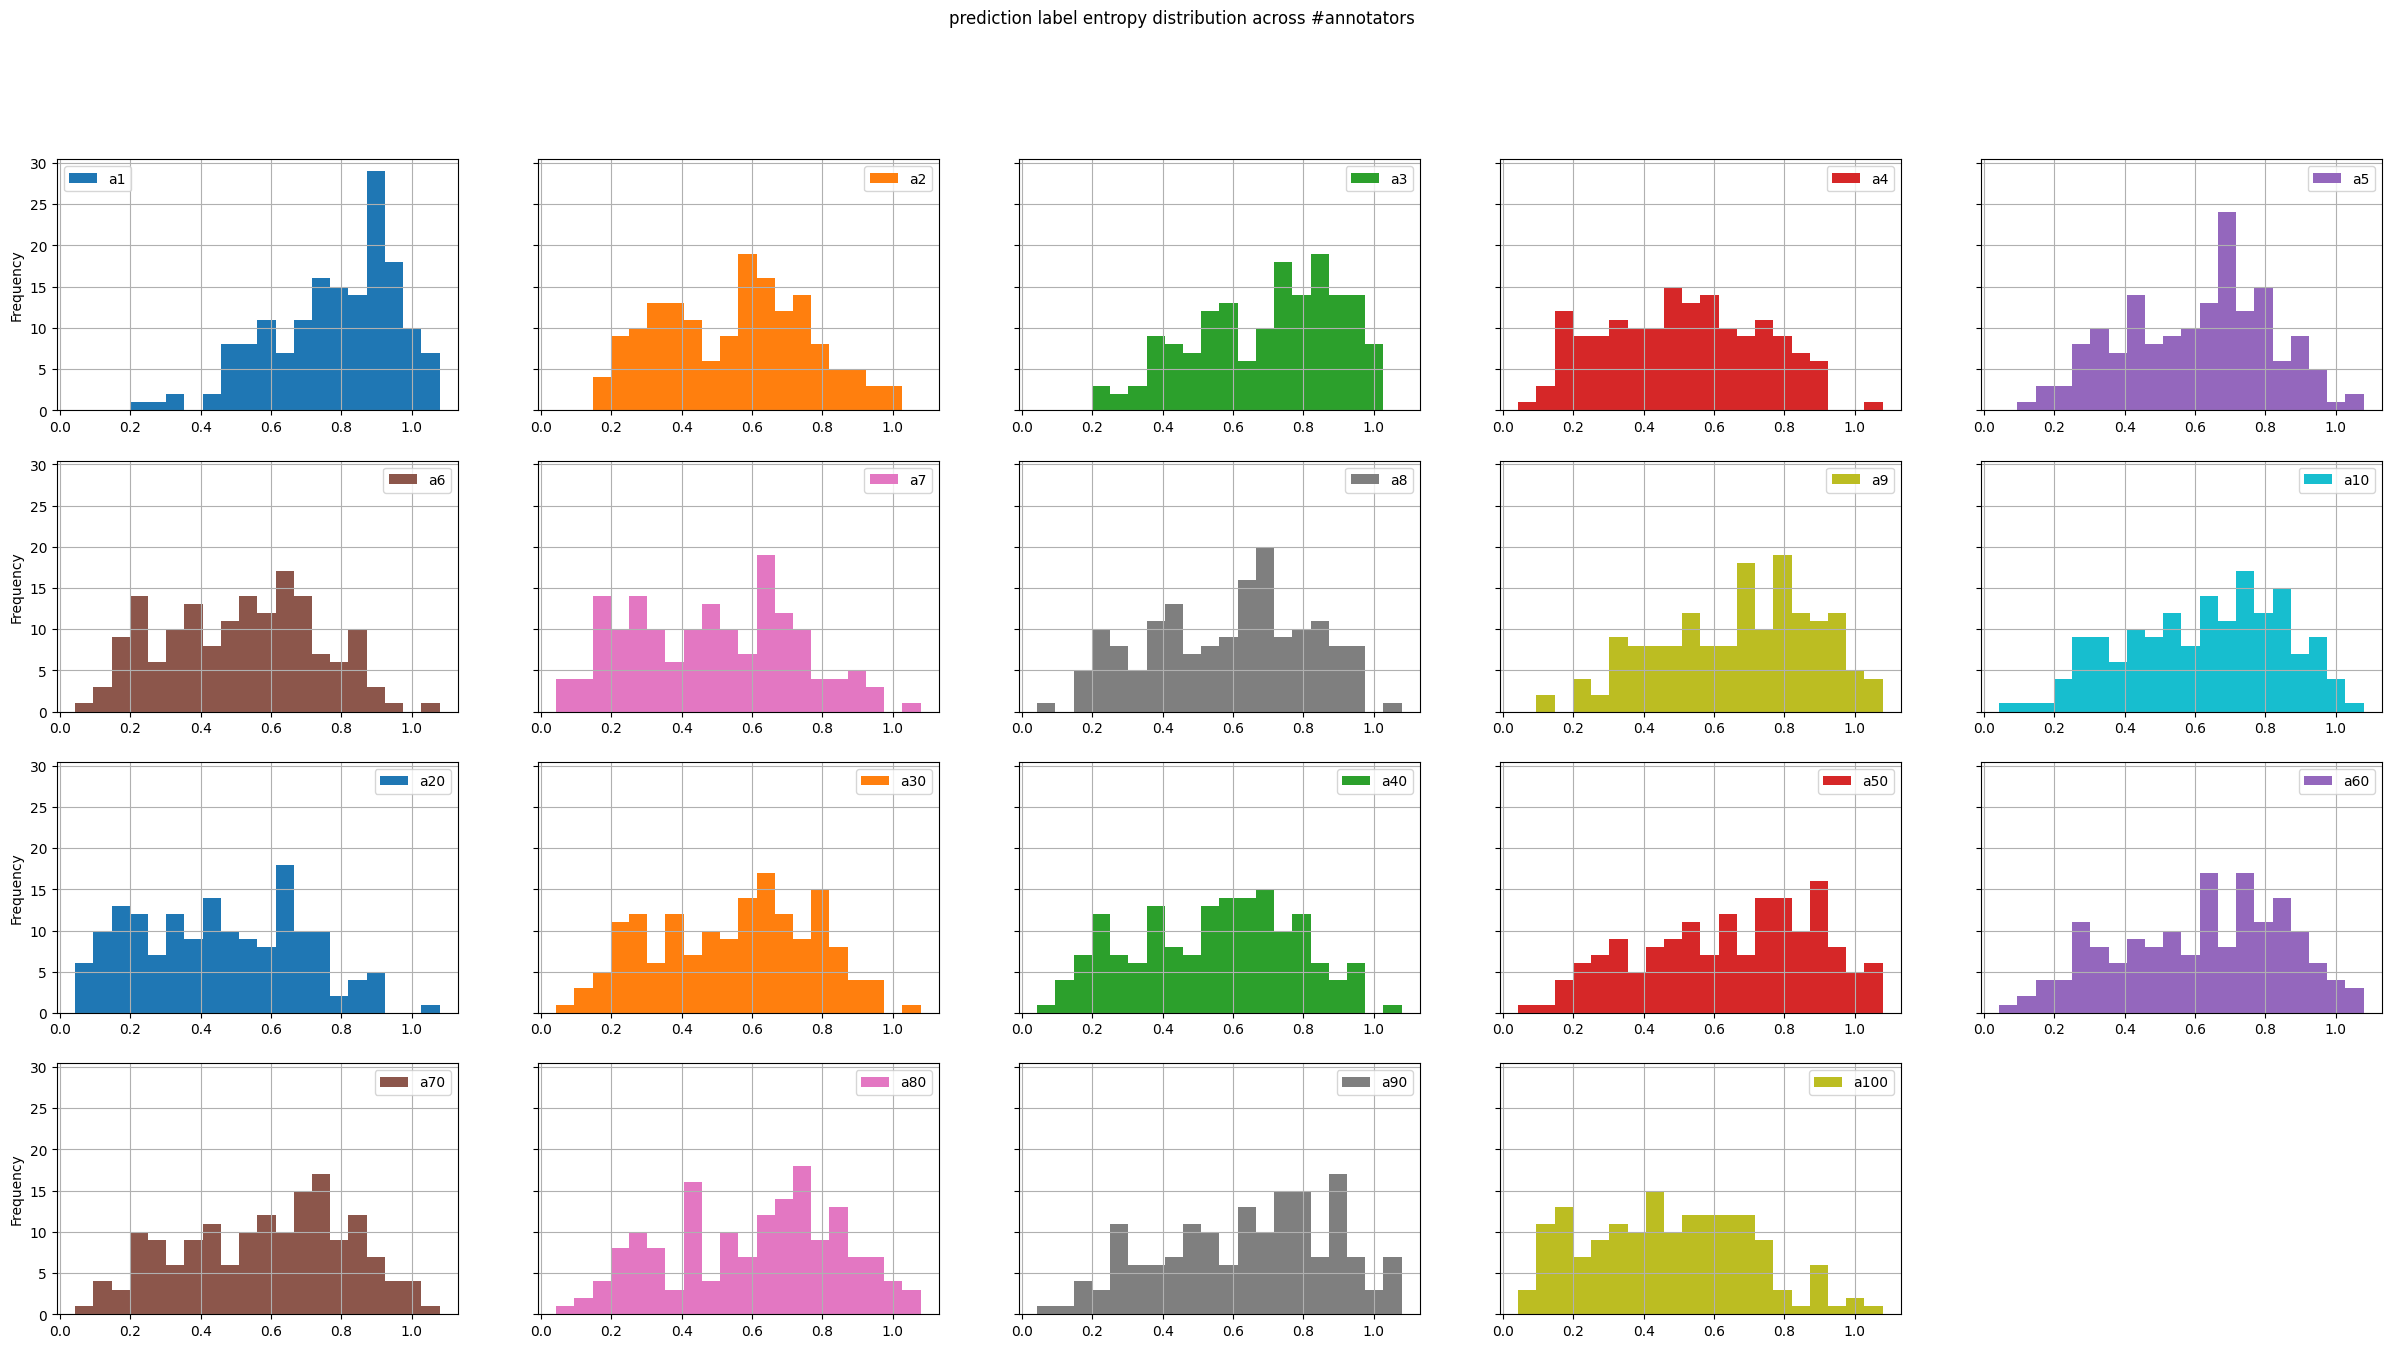

In [50]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
#df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_smnli_mean_entropy.plot(subplots=True, figsize=(30,15), kind="hist", layout=(4,5), sharey=True, sharex=False,
grid=True, bins=20, title="prediction label entropy distribution across #annotators" #, layout=(4,5)
)
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()

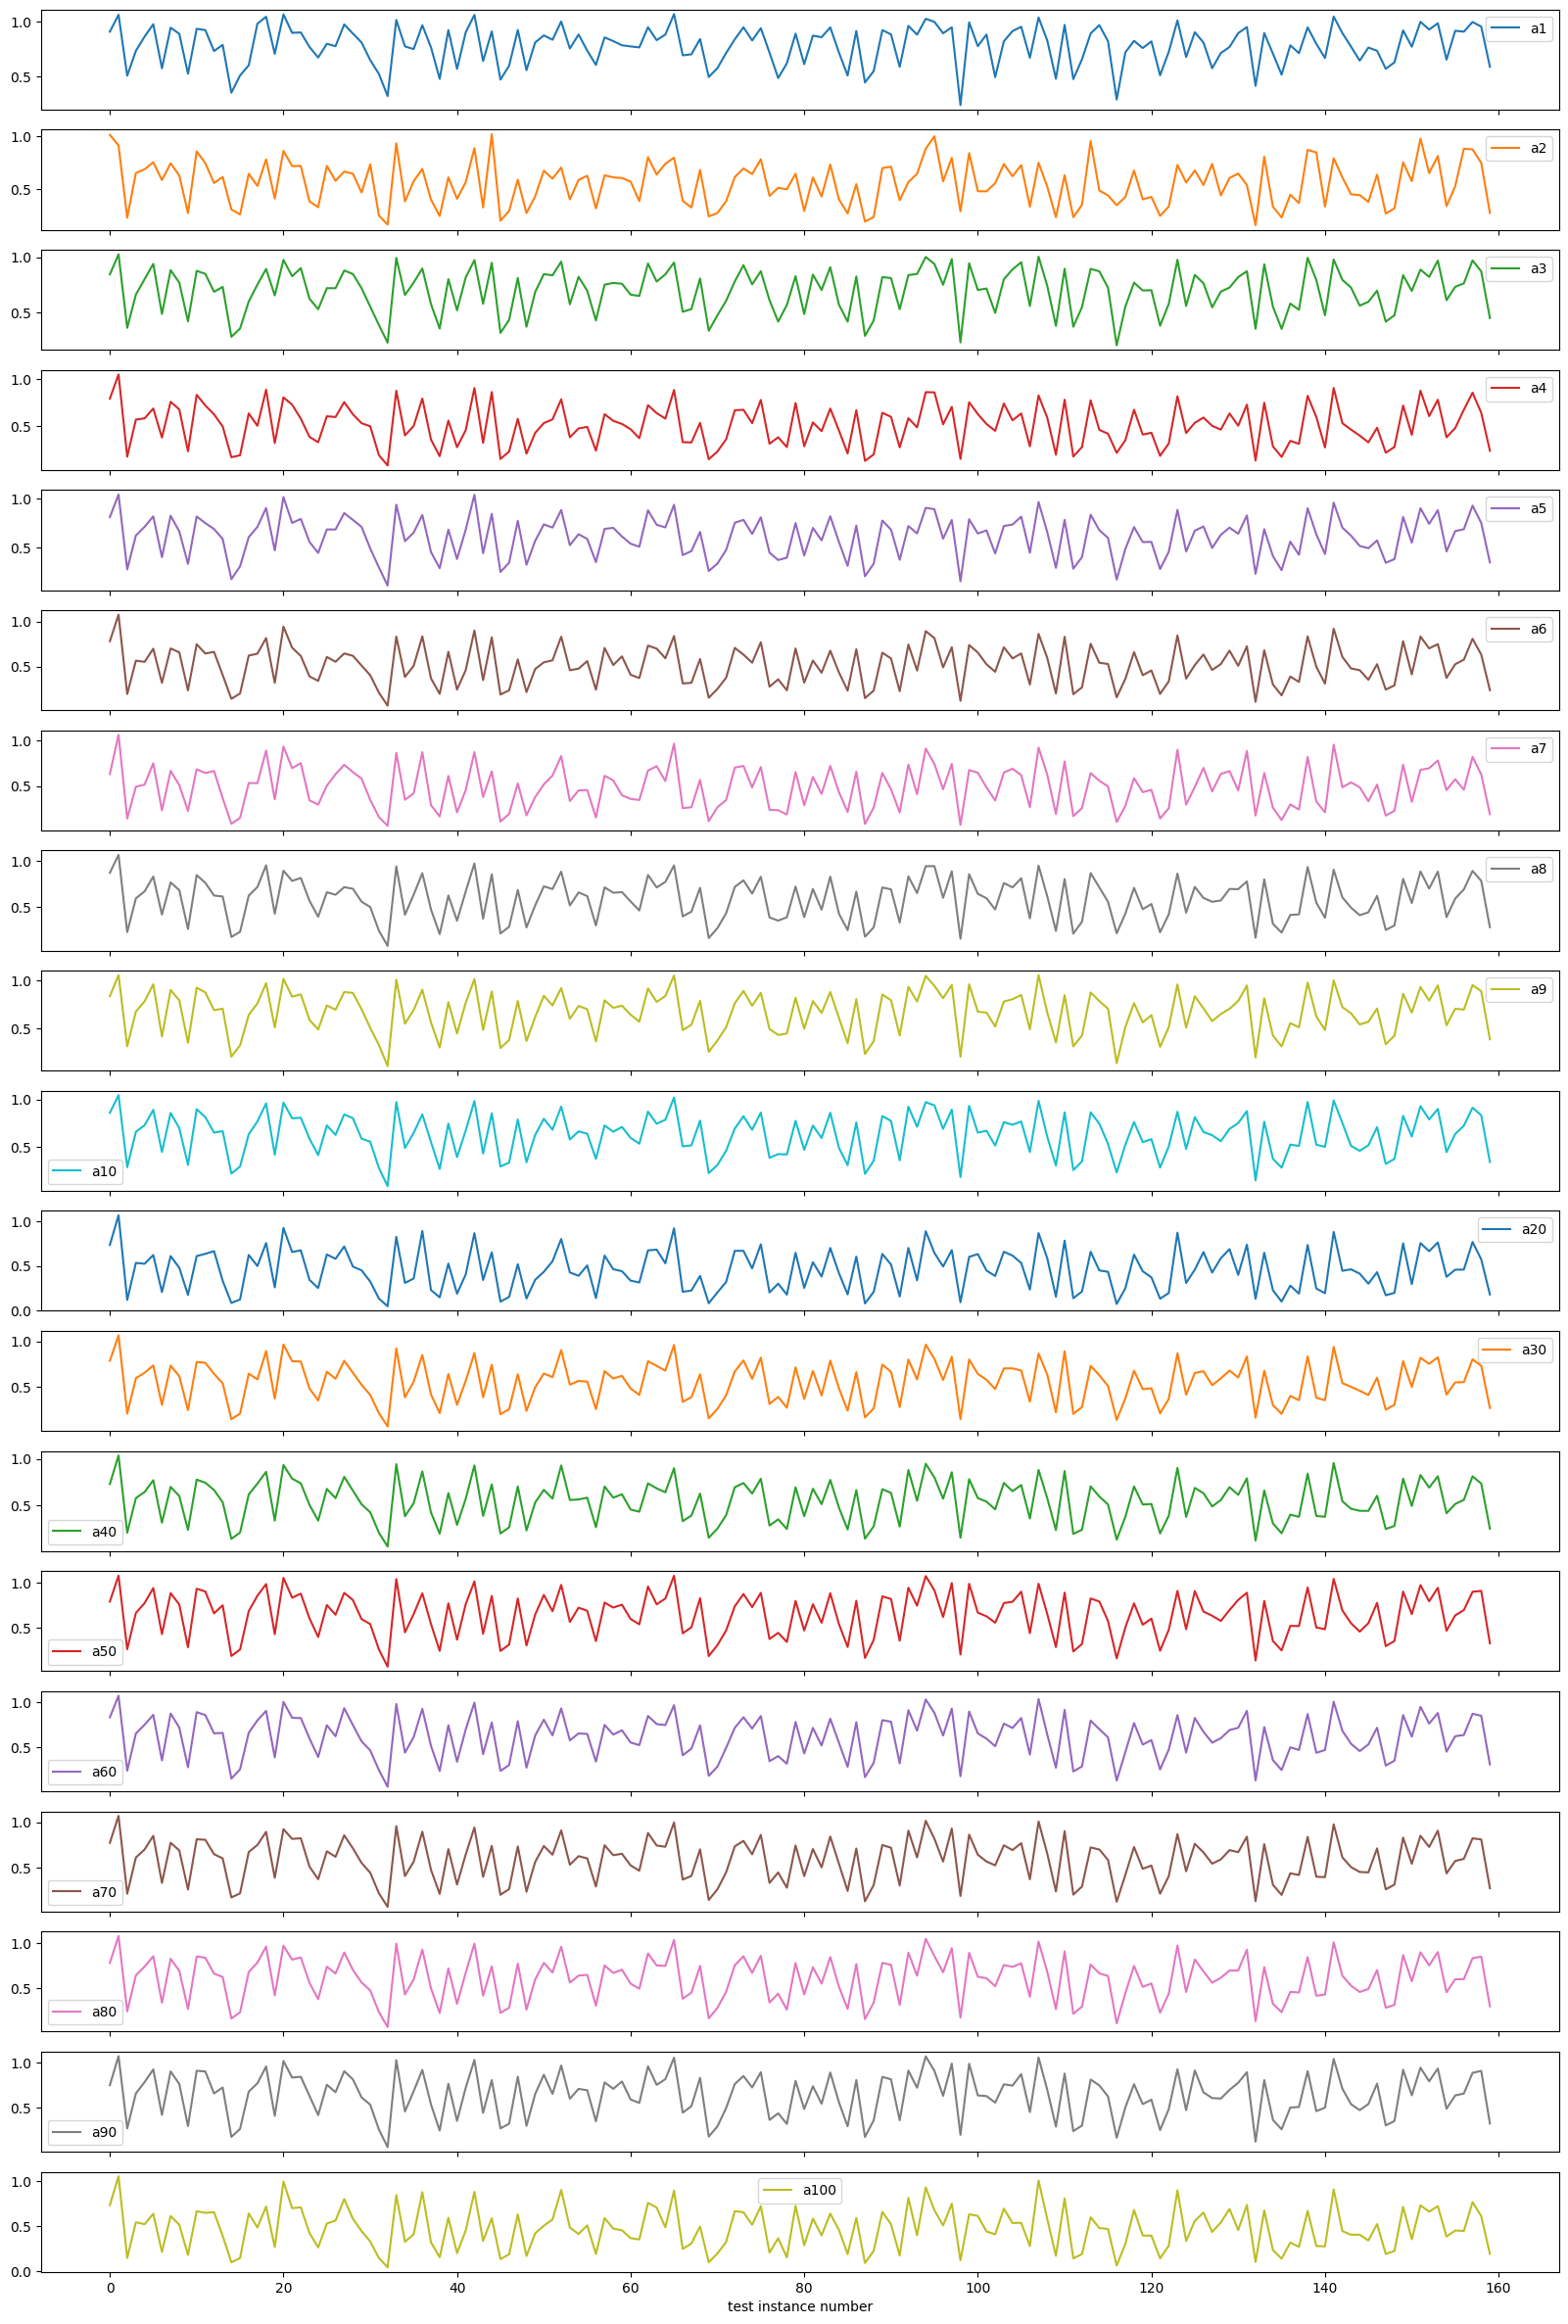

In [51]:
#df_ann_smnli_mean_entropy.columns.name = 'Type A'
df_ann_smnli_mean_entropy.index.name = 'test instance number'
df_ann_smnli_mean_entropy.plot(subplots=True, figsize=(20,30), sharex=True, sharey=False) #, layout=(4,5)
#ax.set(xlabel="x label", ylabel="y label")
# plt.xlabel('instance')
#plt.ylabel('ylabel')
#plt.savefig("/home/pritam.k/research/hlv/ipynbs/hlv-ipynbs/figs/instance-entropy-smnli-csnli.png", bbox_inches='tight', dpi=400)
plt.show()